# **주제 : 한국의 출산율은 왜 이렇게 낮을까?**



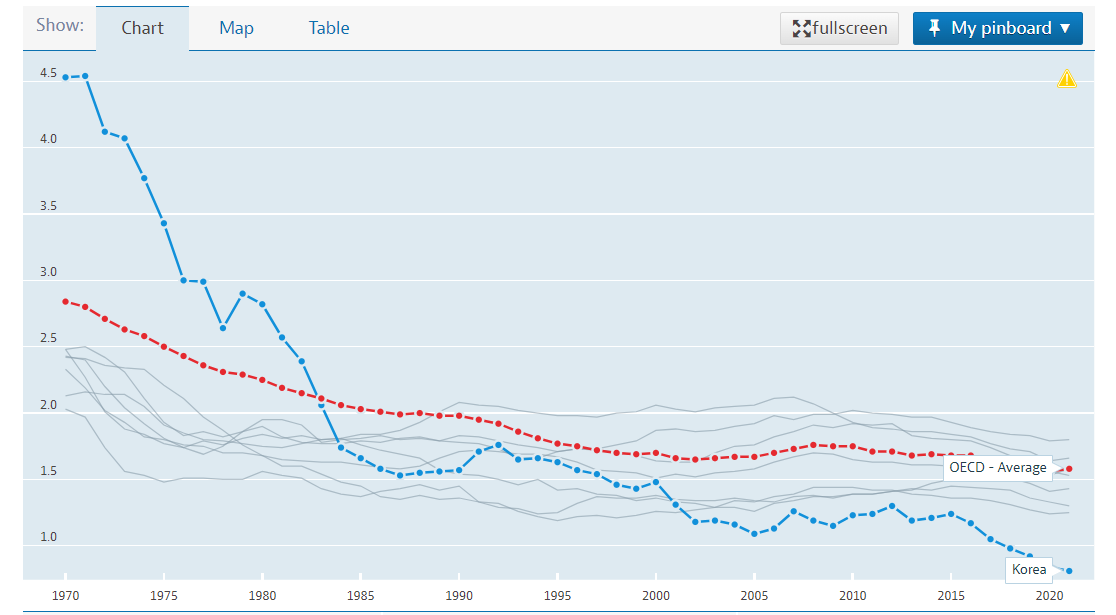

**한국 사회는 분명히 망가져 있다.** 이는 데이터를 통해 쉽게 확인할 수 있다. 압도적인 수치로 OECD 자살률 1위, 청소년 사망원인 1위가 고의적 자해, 세계 행복 순위 2023년 3월 기준 38개국 중 35위, 출산율 꼴등을 기록하고 있는 나라가 과연 정상적이라고 할 수 있을까?

그렇다면 왜 한국은 통계에서 이상값이 나타날까?

이 질문의 바탕에는 수많은 요인들이 있겠지만 그 중에서도 이번 데이터 분석은 **'출산율'에 주목**하여 진행하였다.

2024년 통계청에서 밝힌 자료에 따르면, 2023년 출생아 수는 23만 명으로 전년보다 1만 9,200명이 줄어 7.7% 감소했으며, 여성 1명이 평생 동안 낳을 것으로 예상되는 평균 출생아 수를 의미하는 합계출산율은 2023년 0.72명으로, 2022년의 0.78명보다 0.06명 감소했다.

여기서, 합계출산율이 0.7명 이하라는 의미는, 불과 두 세대 만에 200명이 25명 이하로 줄어든다는 의미다.([출처](https://www.sisain.co.kr/news/articleView.html?idxno=51890))



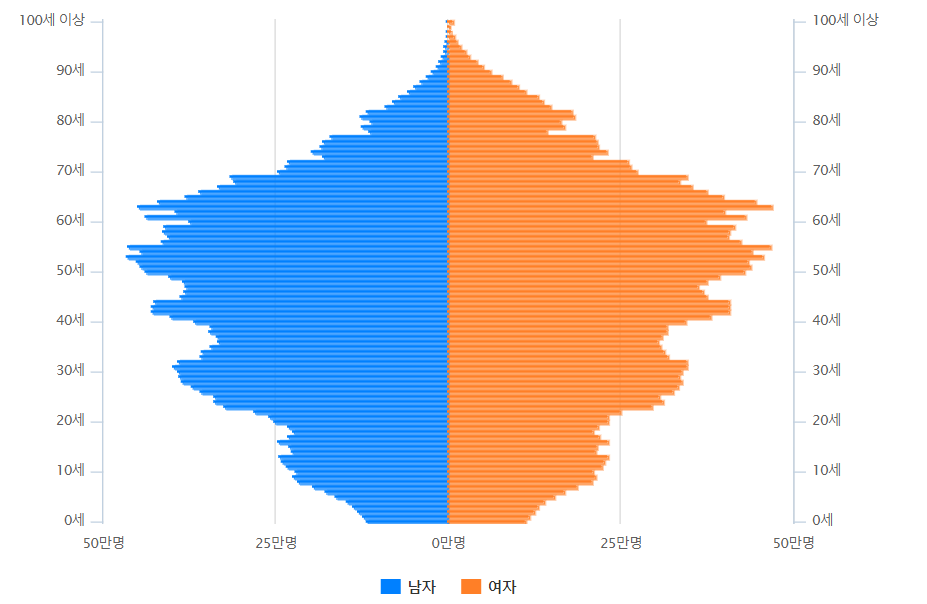

이대로 출산율이 유지 혹은 감소하면 한국의 비정상적인 인구 피라미드의 구조는 점점 극단적으로 변해 갈 것이며, 이는 한국 사회의 생산성 하락 및 사회 기금 고갈, 내수 시장의 축소 등 수많은 문제를 발생시킬 수 있다.

그렇다면 과연 한국의 어떤 부분들이 지금의 출산율이 되기 까지에 영향을 미쳤을지, 어떤 부분을 개선하면 출산율을 증가시키고, 보다 더 나은 사회 - 아이를 낳아서 기를 만큼의 사회가 될 수 있을지 모색해보고자 한다.

이를 위해 크게 소주제를 두 가지 생각해보았다.

**1. 청년층의 사회 진출에 따른 출산율**


**2. 아이를 키우는 환경(가치관)에 따른 출산율**

그리고 각각의 소주제에 따른 가설들을 세워보았다.

### 각 나라별 출산율 데이터 준비(Fertility_rates.csv, fer_df)



각 나라별 1990년, 2021년의 출산율과 15-19세 출산 빈도(Col4) 데이터를 데이터 분석을 위해 준비한다. 데이터는 The World Bank에서 크롤링하여 csv 형식으로 저장하였다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

fer_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/24-1전공교과/응용데이터분석/Term_project1/Fertility_rates.csv")
fer_df = fer_df.iloc[:, :4]
fer_df.head(5)

,Country,1990,2021,Col4
0,Afghanistan,7.6,4.6,83
1,Albania,2.9,1.4,15
2,Algeria,4.6,2.9,12
3,American Samoa,..,..,30
4,Andorra,..,..,6


## 1. 청년층의 사회 진출에 따른 출산율

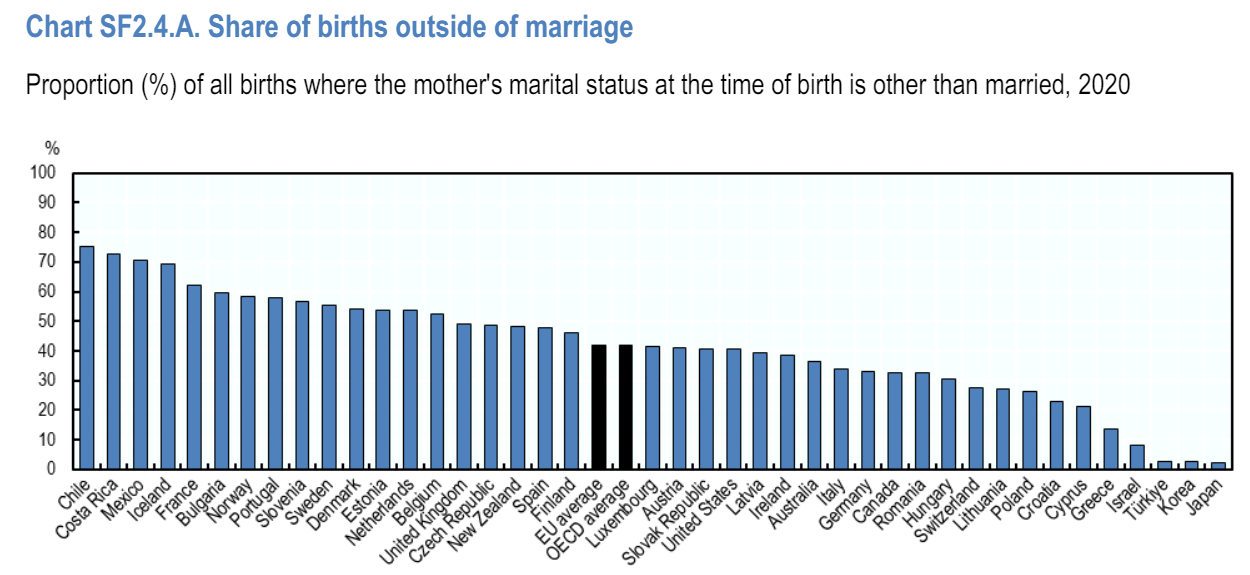

한국에서는 **결혼 연령과 출산율은 매우 밀접한 관계를 가질 것**이다. OECD의 자료에 따르면 특히 한국의 경우 일본과 더불어 혼외 출산율(births outside of marriage)이 매우 낮다. 따라서 결혼 연령이 늦어질수록 출산율은 당연히 낮아지게 된다. 왜냐하면 다른 나라들과는 다르게, 결혼을 한 이후에 대부분의 사람들이 아이를 낳기 때문이다.

한국의 결혼 연령이 늦어지는 것과 출산율의 관계를 더 자세히 살펴본다면 다음과 같다.

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/24-1전공교과/응용데이터분석/Term_project1/전체_모연령별출산율.csv",encoding='utf-8')
df.head(3)

,시도별,1993,1993.1,1993.2,1993.3,1993.4,1993.5,1993.6,1993.7,1994,...,2021.6,2021.7,2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7
0,시도별,합계출산율,모의 연령별출산율:15-19세,20-24세,25-29세,30-34세,35-39세,40-44세,45-49세,합계출산율,...,40-44세,45-49세,합계출산율,모의 연령별출산율:15-19세,20-24세,25-29세,30-34세,35-39세,40-44세,45-49세
1,전국,1.654,4.4,71.9,176.5,63.2,13.5,2.0,0.2,1.656,...,7.6,0.2,0.778,0.4,4.1,24.0,73.5,44.1,8.0,0.2
2,서울특별시,1.558,2.7,54.2,168.4,70.0,14.0,1.8,0.2,1.565,...,8.3,0.2,0.593,0.2,1.4,9.9,53.5,43.4,8.7,0.2


In [4]:
selected_df = df.iloc[:, 1:]
df = selected_df.iloc[[1]]

years = sorted(set([col.split('.')[0] for col in df.columns]))
# print(years)

new_df = pd.DataFrame(np.array_split(df.values.flatten(), 30))
new_df = new_df.drop(columns=0)
new_df.head(3)

,1,2,3,4,5,6,7
0,4.4,71.9,176.5,63.2,13.5,2.0,0.2
1,4.0,65.4,177.5,67.0,14.5,2.2,0.3
2,3.7,62.4,175.3,68.6,15.0,2.4,0.2


현재 전체 모_연령별 출산율 데이터로 구성된 dataframe은 연도를 기준으로 새로운 행으로 만들었기에 ['합계출산율',	'모의 연령별출산율:15-19세',	'20-24세',	'25-29세',	'30-34세',	'35-39세',	'40-44세',	'45-49세'] 로 구성한 후 첫번째 열을 drop하였다.

In [5]:
new_df.columns = ['15-19', '20-24', '25-29','30-34','35-39','40-44','45-49']
new_df.head(3)

,15-19,20-24,25-29,30-34,35-39,40-44,45-49
0,4.4,71.9,176.5,63.2,13.5,2.0,0.2
1,4.0,65.4,177.5,67.0,14.5,2.2,0.3
2,3.7,62.4,175.3,68.6,15.0,2.4,0.2


In [6]:
scaler = StandardScaler()

# 각 행 별로 표준화
standardized_df = new_df.copy()
for i in range(len(standardized_df)):
    standardized_df.iloc[i] = scaler.fit_transform(standardized_df.iloc[i].values.reshape(-1, 1)).flatten()

print(standardized_df.head(3))

      15-19     20-24     25-29     30-34     35-39     40-44     45-49
0 -0.722126  0.411821  2.169018  0.265668 -0.569253 -0.762444 -0.792683
1 -0.726084  0.304193  2.185203  0.331041 -0.549896 -0.756287 -0.788169
2  -0.73238  0.265084  2.183546  0.370438 -0.540364  -0.75447 -0.791854


그러나 사실상 15-19세, 40-44세, 45-49세 출산율의 경우 다른 연령대에 비해 상대적으로 작은 비율을 가지고 있기에 그래프 시각화에서 제외한다면, 최종 그래프는 다음과 같이 나타낼 수 있다.

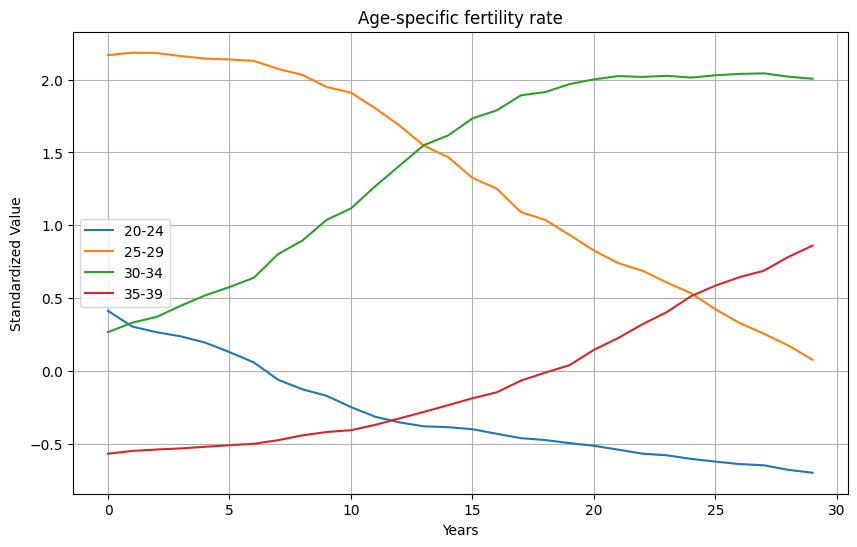

In [7]:
df = standardized_df
df = df.drop(columns=[df.columns[0], df.columns[-2], df.columns[-1]])

# 각 열에 대한 선 그래프 그리기
plt.figure(figsize=(10, 6))

for col in df.columns:
    plt.plot(df[col], label=col)

plt.xlabel('Years')
plt.ylabel('Standardized Value')
plt.title('Age-specific fertility rate')
plt.legend()
plt.grid(True)

plt.show()

1993년부터 2022년까지 한국의 연령별 출산율을 살펴보면 20대의 출산율은 꾸준히 감소해왔고, 30대의 출산율은 어느정도는 상승해왔음을 알 수 있다. 하지만 그마저도 30-34세의 비율은 정체되기 시작했으며, 35-39세의 비율이 점차 늘어나고 있다.

즉, 출산 연령은 점차 고령화되고 있으며 현실적으로 어느정도의 나이를 넘길 경우 출산을 하는 것은 한계에 부딪히게 된다. 결과적으로 출산 연령이 계속 높아질 경우 당연히 출산율은 낮아질 것임이 자명하다.

그렇다면 출산 연령을 낮추기 위해서는 어떻게 해야 할까?

그 해답을 우선 결혼 연령과 연관지어 가설을 설정해보고자 한다. 다만 oecd 나라별 데이터를 비교함에 있어서, 앞서 밝혔듯이 타 나라의 경우 결혼을 하지 않고도 태어나는 아이들이 많다. 따라서 출산율이 결혼 연령과 직접적으로 관련되지 않은 나라들이 많으므로, 출산율과 관련한 데이터를 직접 사용하였다.

출산 연령을 낮추기 위해서는 우선 **20-30대의 사회 진출 시기를 앞당겨야 할 것**이다, 라는 생각을 하게 되었다. 왜냐하면 결국 결혼을 하고 아이를 낳는 것은, 가정과 가족을 책임질 준비가 되었다고 생각이 될 때쯤 이루어지는 경우가 많을 것이라 생각하기 때문이다. 이런 관점에서 몇 가지 가설을 세워보았다.

**1. 국회의원의 평균연령이 높을 수록 출산율이 낮을 것이다.**

국회의원은 한 나라 안에서 살아가는 사람들을 대표하는 직업이다. 그런 점에서 국회의원의 연령이 높은 나라는 그만큼 기존의 중·장·노년층이 사회에서 기득권층에 많이 자리하고 있다는 뜻으로 해석할 수 있다면, 청년층의 사회 진출은 그렇지 않은 나라보다는 어렵고, 그렇다면 출산율이 낮지 않을까? 라는 생각을 하게 되었다. 또한, 국회의원의 연령이 높은 경우 청년층에 대한 복지보다는 중·장·노년층에 대한 복지에 조금 더 비중을 둔 정책들이 나오지 않을까 생각했기 때문이기도 하다.

**2. 15-24세 고용률이 높을 수록 출산율이 높을 것이다.**

15-24세 고용률이 높다는 것은 그만큼 청년층의 사회 진출이 빠르다는 것이고, 이는 자연히 가정과 가족을 이루기 위한 준비가 더 빨리 될 수 있다는 생각을 했다. 따라서 젊은 층의 고용률과 출산율이 관련이 있을 것이라 생각하였다.

**3. 대기업과 중소기업 연봉 차이가 커질수록 출산율이 낮을 것이다.**

2023년 경제협력개발기구(OECD) 교육지표에 따르면 한국의 청년층(만 25~34세) 고등교육 이수율은 69.6%로 OECD 평균보다 높아 1위를 차지했다. 통계 수치로 알 수 있듯이 한국은 대학교까지 진학하는 경우가 많고 그에 따라 사람들의 학력은 점차 높아져왔다.

그렇기에 높아진 학력에 따라 중소기업보다는 대기업을 사람들이 선호할 것이라 생각했다. 이러한 관점에서 중소기업과 대기업의 연봉 차이가 큰 시기에는 더더욱 대기업을 선호할 것이라 생각했고, 경쟁률이 높아짐에 따라 취업 준비기간이 길어질 것이라 생각했다. 그러면 자연히 사회 진출 연령이 늦어질 것이라는 가설을 생각해볼 수 있다.

즉, 중소기업과 대기업의 연봉 차이가 커질수록 출산율이 낮을 것이다, 라는 가설을 세워보았다.

### **가설 1) 국회의원의 평균 연령이 높을 수록 출산율이 낮을 것이다.(나라별 비교)**

각 나라별 국회의원의 평균 연령 데이터는 IPU parline 사이트에서 크롤링하여  수집하였으며, 2019-2024년에 걸쳐 각 나라별로 수집된 데이터가 나와있고 한국의 경우 결측값으로 되어 있다. 이 때문에 한국의 경우 자료 검색을 통해 21대 국회의 평균 연령값을 사용하였다.

#### Data preparation

국회의원 평균 연령 데이터는 출산율 데이터와 통합하기 위해, 여러 가지로 표기가 가능한 나라 이름들(예. Korea, Republic of Korea, South Korea 등)에 대해서 나라이름을 축약해서 표기(예. KOR)하는 방식으로 데이터의 손실을 어느정도 방지하였다.(데이터에 맞춰서 변환 사전을 바꾸어 같은 축약 형식으로 변환하였다.)

In [8]:
chamber_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/24-1전공교과/응용데이터분석/Term_project1/Chamber_age.csv')
chamber_df.head(3)

,Unnamed: 0,Country,Value
0,0,Albania,48.70
1,1,Algeria,53.45
2,2,Andorra,45.30


In [9]:
replacements = {
    'United States of America': 'USA',
    'China': 'CHN',
    'Japan': 'JPN',
    'Russian Federation' : 'RUS',
    'Canada' : 'CAN',
    'Brazil' : 'BRA',
    'Korea' : 'KOR',
    'Mexico' : 'MEX',
    'Türkiye' : 'TUR',
    'United Kingdom' : 'UKG',
    'France' : 'FRN',
    'Netherlands' : 'NTH',
    'Germany' : 'GMY',
    'Italy' : 'ITA',
    'Australia' : 'AUL',
    'Spain' : 'SPN',
    'Indonesia' : 'INS',
    'Switzerland' : 'SWZ',
    'Belgium' : 'BEL',
    'India' : 'IND',
    'Austria' : 'AUT',
    'Sweden' : 'SWE',
    'Finland' : 'FIN',
    'Norway' : 'NOR',
    'Denmark' : 'DEN',
    'Ireland' : 'IRL',
    'Portugal' : 'POR',
    'Poland' : 'POL',
    'Czech Republic' : 'CZE',
    'Slovakia' : 'SVK',
    'Slovenia' : 'SVN',
    'Greece' : 'GRC',
    'Hungary' : 'HUN',
}
chamber_df['Country'] = chamber_df['Country'].replace(replacements)
chamber_df = chamber_df.iloc[:,1:]

fer_replacements = {
    'United States': 'USA',
    'China': 'CHN',
    'Japan': 'JPN',
    'Russian Federation' : 'RUS',
    'Canada' : 'CAN',
    'Brazil' : 'BRA',
    'Korea, Rep.' : 'KOR',
    'Mexico' : 'MEX',
    'Türkiye' : 'TUR',
    'United Kingdom' : 'UKG',
    'France' : 'FRN',
    'Netherlands' : 'NTH',
    'Germany' : 'GMY',
    'Italy' : 'ITA',
    'Australia' : 'AUL',
    'Spain' : 'SPN',
    'Indonesia' : 'INS',
    'Switzerland' : 'SWZ',
    'Belgium' : 'BEL',
    'India' : 'IND',
    'Austria' : 'AUT',
    'Sweden' : 'SWE',
    'Finland' : 'FIN',
    'Norway' : 'NOR',
    'Denmark' : 'DEN',
    'Ireland' : 'IRL',
    'Portugal' : 'POR',
    'Poland' : 'POL',
    'Czech Republic' : 'CZE',
    'Slovakia' : 'SVK',
    'Slovenia' : 'SVN',
    'Greece' : 'GRC',
    'Hungary' : 'HUN',
}
fer_df['Country'] = fer_df['Country'].replace(fer_replacements)

In [10]:
# DataFrame의 내용을 생략 없이 출력
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(fer_df)

In [11]:
# 'Country' 열의 값이 완전히 일치하는 행만 선택하여 따로 데이터프레임을 구성하였다.
merged_inner = pd.merge(fer_df, chamber_df, on='Country', how='inner')
merged_inner.dropna()
merged_inner = merged_inner.rename(columns={'Value': 'Age'})
merged_inner

,Country,1990,2021,Col4,Age
0,Albania,2.9,1.4,15,48.70
1,Algeria,4.6,2.9,12,53.45
2,Andorra,..,..,6,45.30
3,Antigua and Barbuda,2.2,1.6,33,54.00
4,Argentina,3.0,1.9,39,53.85
...,...,...,...,...,...
112,USA,2.1,1.7,16,61.00
113,Uruguay,2.4,1.5,36,54.95
114,Uzbekistan,4.1,3.2,16,51.50
115,Viet Nam,3.6,1.9,35,49.80


In [12]:
# 한국 데이터 추가
new_row = pd.DataFrame({'Country': ['KOR'], '1990': [1.6], '2021': [0.8], 'Col4': [2], 'Age': [54.9]})
result_df = pd.concat([new_row, merged_inner], ignore_index=True)
result_df

,Country,1990,2021,Col4,Age
0,KOR,1.6,0.8,2,54.90
1,Albania,2.9,1.4,15,48.70
2,Algeria,4.6,2.9,12,53.45
3,Andorra,..,..,6,45.30
4,Antigua and Barbuda,2.2,1.6,33,54.00
...,...,...,...,...,...
113,USA,2.1,1.7,16,61.00
114,Uruguay,2.4,1.5,36,54.95
115,Uzbekistan,4.1,3.2,16,51.50
116,Viet Nam,3.6,1.9,35,49.80


<ipython-input-13-855d3956c5aa>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([label if label.get_text() == 'KOR' else '' for label in ax.get_xticklabels()])


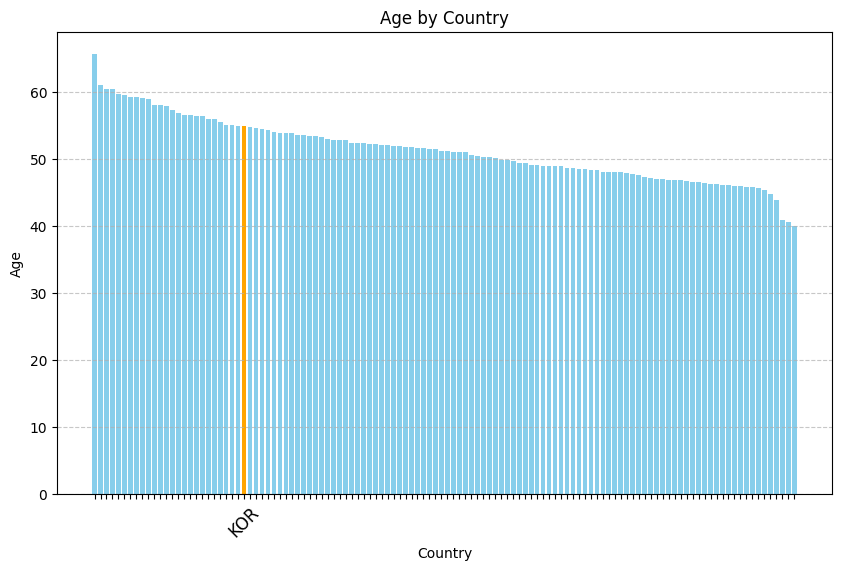

In [13]:
# result_df = merged_inner

# 데이터 시각화
country_value_df = result_df[['Country', 'Age']]
country_value_df = country_value_df.sort_values(by='Age', ascending=False)

# Country별 색상 설정 (KOR는 다른 색상으로)
colors = ['skyblue' if country != 'KOR' else 'orange' for country in country_value_df['Country']]

# Country를 기준으로 막대 그래프 생성
plt.figure(figsize=(10, 6))
plt.bar(country_value_df['Country'], country_value_df['Age'], color=colors)

# KOR 레이블만 표시하고 나머지 레이블 숨기기
plt.xlabel('Country')
plt.ylabel('Age')
plt.title('Age by Country')
plt.xticks(rotation=45, fontsize=12)
ax = plt.gca()
ax.set_xticklabels([label if label.get_text() == 'KOR' else '' for label in ax.get_xticklabels()])

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### EDA

In [14]:
result_df = merged_inner

# 2021년 출산율('2021')과 국회의원 연령('Age') 간의 상관 관계 계산
result_df['2021'] = pd.to_numeric(result_df['2021'], errors='coerce')
result_df['Age'] = pd.to_numeric(result_df['Age'], errors='coerce')

correlation = result_df['2021'].corr(result_df['Age'])
print(f'Correlation between 2021 and Age: {correlation}')

Correlation between 2021 and Age: -0.0686575736931729


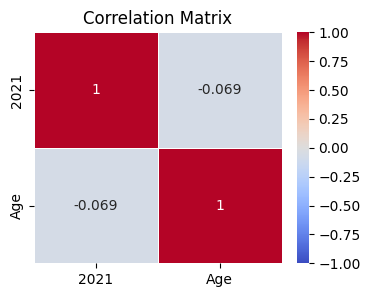

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# 2021년 출산율('2021')과 국회의원 연령('Age') 간의 상관 관계 계산
correlation_matrix = result_df[['2021', 'Age']].corr()

# 상관 관계 행렬을 히트맵으로 시각화
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### Regression

In [16]:
# "NaN" 문자열을 NaN 값으로 변환
result_df.replace('NaN', np.nan, inplace=True)

# 결측값 제거
result_df.dropna(subset=['2021', 'Age'], inplace=True)
result_df

,Country,1990,2021,Col4,Age
0,Albania,2.9,1.4,15,48.70
1,Algeria,4.6,2.9,12,53.45
3,Antigua and Barbuda,2.2,1.6,33,54.00
4,Argentina,3.0,1.9,39,53.85
5,Armenia,2.7,1.6,19,40.00
...,...,...,...,...,...
112,USA,2.1,1.7,16,61.00
113,Uruguay,2.4,1.5,36,54.95
114,Uzbekistan,4.1,3.2,16,51.50
115,Viet Nam,3.6,1.9,35,49.80


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = result_df[['Age']]
y = result_df['2021']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.2319571641118414


In [18]:
# 예측(KOR 데이터로 예측해보았다.)
new_data = pd.DataFrame({'Age': [54.9]})
predicted_age = model.predict(new_data)
print(f'실제 한국 2021 출산율: 0.8')
print(f'예측한 출산율: {predicted_age[0]}')

실제 한국 2021 출산율: 0.8
예측한 출산율: 2.066458624655387


In [19]:
import statsmodels.api as sm

# statsmodels의 OLS 모델을 사용하여 회귀 분석
X_train_sm = sm.add_constant(X_train)  # 절편 추가
ols_model = sm.OLS(y_train, X_train_sm).fit()

# 회귀 분석 결과 출력
print(ols_model.summary())

# 테스트 데이터에 대한 예측
X_test_sm = sm.add_constant(X_test)
y_pred = ols_model.predict(X_test_sm)

                            OLS Regression Results                            
Dep. Variable:                   2021   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.355
Date:                Sat, 25 May 2024   Prob (F-statistic):              0.128
Time:                        07:11:31   Log-Likelihood:                -125.37
No. Observations:                  91   AIC:                             254.7
Df Residuals:                      89   BIC:                             259.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9080      1.139      3.431      0.0

LinearRegression을 통해 국회의원의 평균 연령으로 한국의 출산율을 예측해본 결과 2.06명이 나왔다. 이는 실제 2021년의 한국 출산율(0.8)과는 꽤나 차이가 있는 예측값이다.

#### Visualize

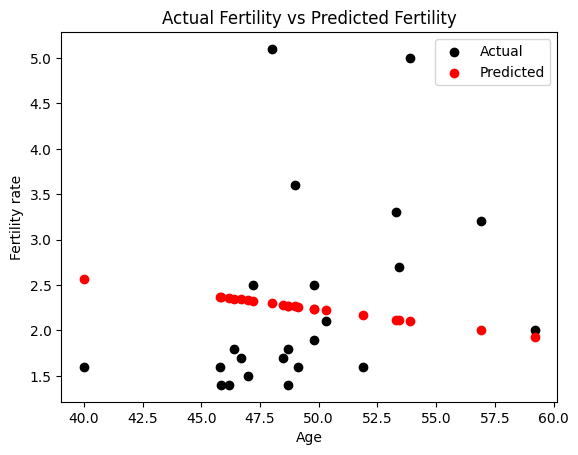

In [20]:
# 예측 결과 시각화
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Age')
plt.ylabel('Fertility rate')
plt.title('Actual Fertility vs Predicted Fertility')
plt.legend()
plt.show()

#### 결론

각 나라별 국회의원의 연령과 2021년도의 출산율을 비교해보았을때, 상관계수가 약 "-0.0696" 값으로 관련성이 거의 없는 것으로 나타났고, 국회의원 연령과 출산율, 그리고 예측값 간에 패턴이 보이지 않아 이 두 변수 사이에는 큰 연관성이 없다는 결론을 도출하였다.

다만 선형 회귀 모델로 예측한 값을 살펴보면, 국회의원의 나이가 증가하면 대체로 출산율도 내려가도록 보이는 경향이 학습 된 것으로 보아 어느정도는 관련이 있을 수 있겠다라는 가능성을 보인다.

### **가설 2) 15-24세 고용률이 높을 수록 출산율이 높을 것이다.(나라별 비교)**

각 나라별 15-24세 고용률 데이터는 OECD 사이트에서 크롤링하여 수집하였다.

#### Data preparation

In [21]:
emp_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/24-1전공교과/응용데이터분석/Term_project1/Employment_rate.csv')
replacements = {
    'United States': 'USA',
    'China': 'CHN',
    'Japan': 'JPN',
    'Russian Federation' : 'RUS',
    'Canada' : 'CAN',
    'Brazil' : 'BRA',
    'Korea' : 'KOR',
    'Mexico' : 'MEX',
    'Türkiye' : 'TUR',
    'United Kingdom' : 'UKG',
    'France' : 'FRN',
    'Netherlands' : 'NTH',
    'Germany' : 'GMY',
    'Italy' : 'ITA',
    'Australia' : 'AUL',
    'Spain' : 'SPN',
    'Indonesia' : 'INS',
    'Switzerland' : 'SWZ',
    'Belgium' : 'BEL',
    'India' : 'IND',
    'Austria' : 'AUT',
    'Sweden' : 'SWE',
    'Finland' : 'FIN',
    'Norway' : 'NOR',
    'Denmark' : 'DEN',
    'Ireland' : 'IRL',
    'Portugal' : 'POR',
    'Poland' : 'POL',
    'Czech Republic' : 'CZE',
    'Slovakia' : 'SVK',
    'Slovenia' : 'SVN',
    'Greece' : 'GRC',
    'Hungary' : 'HUN',
}
emp_df['Country'] = emp_df['Country'].replace(replacements)
emp_df.head(3)

,Unnamed: 0,Country,Value
0,0,AUL,64.91
1,1,AUT,53.03
2,2,BEL,25.86


In [22]:
# 15-24세 고용률 데이터와 출산율 데이터를 합친다.
emp_fer_df = pd.merge(emp_df, fer_df, on='Country')
emp_fer_df = emp_fer_df.drop(emp_fer_df.columns[0], axis=1)
emp_fer_df

,Country,Value,1990,2021,Col4
0,AUL,64.91,1.9,1.7,8
1,AUT,53.03,1.5,1.5,6
2,BEL,25.86,1.6,1.6,5
3,CAN,57.80,1.8,1.4,7
4,Chile,23.32,2.6,1.5,24
5,Colombia,36.74,3.1,1.7,59
6,Costa Rica,28.17,3.2,1.5,37
7,Czechia,25.45,1.9,1.8,10
8,DEN,55.50,1.7,1.7,2
9,Estonia,36.98,2.1,1.6,9


#### EDA

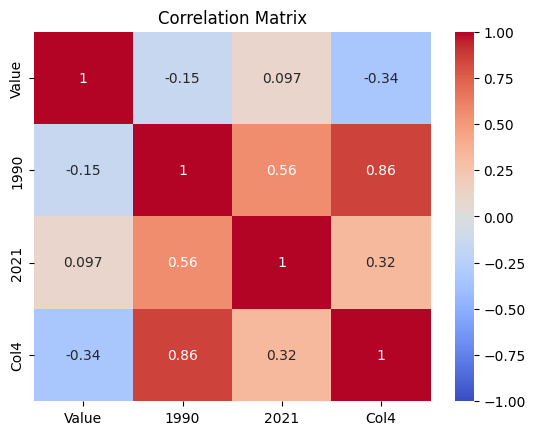

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관 행렬 계산
corr_matrix = emp_fer_df[['Value', '1990', '2021', 'Col4']].corr()
# print(corr_matrix)

# 히트맵으로 시각화
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
emp_fer_df['2021'] = pd.to_numeric(emp_fer_df['2021'], errors='coerce')
emp_fer_df['Value'] = pd.to_numeric(emp_fer_df['Value'], errors='coerce')

# NaN 값이 있는 행 제거
emp_fer_df = emp_fer_df.dropna(subset=['2021', 'Value'])
X = emp_fer_df[['Value', '2021']]

# NaN 또는 inf가 있는지 확인
print("Check for NaNs:\n", X.isna().sum())
print("Check for infs:\n", np.isfinite(X).all())

# VIF 계산
# vif_data = pd.DataFrame()
# vif_data["feature"] = X.columns
# vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# print(vif_data)

Check for NaNs:
 Value    0
2021     0
dtype: int64
Check for infs:
 Value    True
2021     True
dtype: bool


#### Regression - 1

Value(고용률), 1990(1990년의 출산율), Col4(청소년 출산빈도)를 독립변수로 하여 2021(2021년의 출산율)을 예측하였다.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 독립 변수 (X)와 종속 변수 (y) 정의
X = emp_fer_df[['Value', '1990', 'Col4']]
y = emp_fer_df['2021']

# 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# 테스트 데이터에 대한 예측값 출력
print(f'\n Predictions: {y_pred}, Real: {y_test.values}')

Mean Squared Error: 0.08729828836239208
R² Score: -3.988473620708114

 Predictions: [1.2559273  1.50650102 1.89608867 1.22115376 1.48233541 1.78578949
 2.15875314 1.72379731], Real: [1.2 1.6 1.5 1.4 1.6 1.6 1.5 1.6]


In [26]:
# statsmodels를 사용한 회귀 분석 및 통계 검정
# X_train에 절편 추가
X_train_sm = sm.add_constant(X_train_scaled)

# OLS 모델 적합
ols_model = sm.OLS(y_train, X_train_sm).fit()

# 회귀 분석 결과 출력 (t-검정 값 포함)
print(ols_model.summary())

# statsmodels를 사용하여 테스트 데이터 예측
X_test_sm = sm.add_constant(X_test_scaled)
y_pred_sm = ols_model.predict(X_test_sm)

                            OLS Regression Results                            
Dep. Variable:                   2021   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     8.784
Date:                Sat, 25 May 2024   Prob (F-statistic):           0.000343
Time:                        07:11:34   Log-Likelihood:                -1.6713
No. Observations:                  30   AIC:                             11.34
Df Residuals:                      26   BIC:                             16.95
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6233      0.050     32.355      0.0

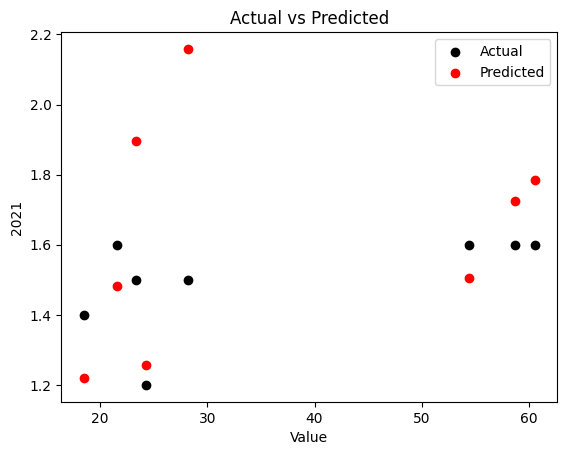

In [27]:
# 예측 결과 시각화
plt.scatter(X_test['Value'], y_test, color='black', label='Actual')
plt.scatter(X_test['Value'], y_pred, color='red', label='Predicted')
plt.xlabel('Value')
plt.ylabel('2021')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

#### Regression - 2

고용률(Value)만 독립변수로 두고 청소년 출산빈도(Col4)을 예측하도록 해보았다.

In [28]:
# 독립 변수 (X)와 종속 변수 (y) 정의
X = emp_fer_df[['Value']]
y = emp_fer_df['Col4']

# 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# 테스트 데이터에 대한 예측값 출력
print(f'\n Predictions: {y_pred}, Real: {y_test.values}')

Mean Squared Error: 108.5860820818751
R² Score: 0.1303329679339248

 Predictions: [17.75704677  7.70065638 18.07778215 19.68480002 18.665797    5.64594538
 16.45740031  6.2540062 ], Real: [ 6 11 24  8 26 13 37  2]


In [29]:
# statsmodels를 사용한 회귀 분석 및 통계 검정
# X_train에 절편 추가
X_train_sm = sm.add_constant(X_train)

# OLS 모델 적합
ols_model = sm.OLS(y_train, X_train_sm).fit()

# 회귀 분석 결과 출력 (t-검정 값 포함)
print(ols_model.summary())

# statsmodels를 사용하여 테스트 데이터 예측
X_test_sm = sm.add_constant(X_test)
y_pred_sm = ols_model.predict(X_test_sm)

                            OLS Regression Results                            
Dep. Variable:                   Col4   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     3.212
Date:                Sat, 25 May 2024   Prob (F-statistic):             0.0839
Time:                        07:11:35   Log-Likelihood:                -123.94
No. Observations:                  30   AIC:                             251.9
Df Residuals:                      28   BIC:                             254.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8690      8.210      3.151      0.0

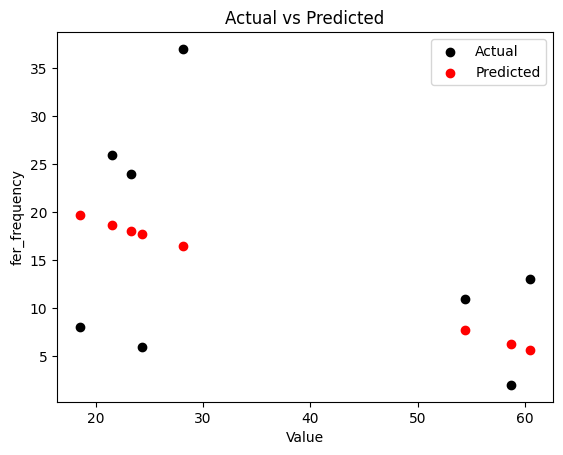

In [30]:
# 예측 결과 시각화
plt.scatter(X_test['Value'], y_test, color='black', label='Actual')
plt.scatter(X_test['Value'], y_pred, color='red', label='Predicted')
plt.xlabel('Value')
plt.ylabel('fer_frequency')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

#### Clustering

In [31]:
emp_fer_df = emp_fer_df.sort_values(by='Col4')
emp_fer_df

,Country,Value,1990,2021,Col4
27,NOR,58.71,1.9,1.6,2
35,SWZ,60.93,1.6,1.5,2
20,KOR,27.78,1.6,0.8,2
8,DEN,55.50,1.7,1.7,2
19,JPN,48.31,1.5,1.3,3
25,NTH,76.43,1.6,1.6,3
34,SWE,45.31,2.1,1.7,3
23,Luxembourg,30.21,1.6,1.4,4
10,FIN,46.28,1.8,1.5,4
18,ITA,20.26,1.3,1.3,4


In [32]:
filtered_df = emp_fer_df[emp_fer_df['Col4'] < 40]

- 클러스터를 8로 설정한 경우

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


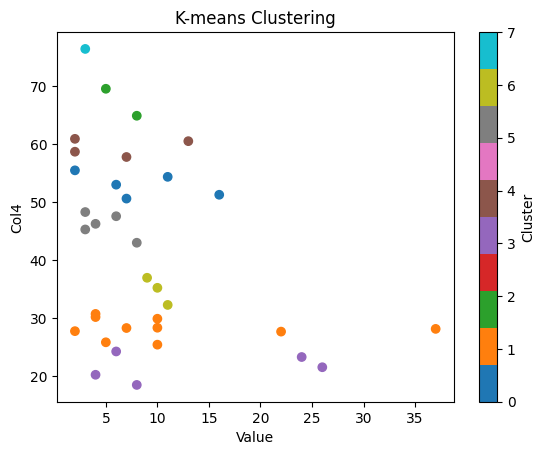

In [33]:
from sklearn.cluster import KMeans

X = filtered_df[['Value']]
y = filtered_df['Col4']

kmeans = KMeans(n_clusters=8, random_state=77)
kmeans.fit(X)

# 클러스터 할당
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

plt.scatter(y, X, c=cluster_labels, cmap='tab10')
plt.xlabel('Value')
plt.ylabel('Col4')

plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()

In [34]:
# 각 클러스터에 속한 데이터 포인트 출력 및 '2021' 열의 평균 값 계산
for i in range(len(cluster_centers)):
    cluster_points = filtered_df[cluster_labels == i]
    #print(f'\nCluster {i}에 속한 데이터 포인트:')
    #print(cluster_points)

    # '2021' 열의 평균 값 계산 및 출력
    sum_data = 0
    count = 0
    for data in cluster_points['Col4'].values:
      sum_data += float(data)
      count += 1
    mean_2021 = np.round(sum_data/count, 4)
    print(f'Cluster {i}의 "Col4" 열 평균 값: {mean_2021}')

Cluster 0의 "Col4" 열 평균 값: 8.4
Cluster 1의 "Col4" 열 평균 값: 11.1
Cluster 2의 "Col4" 열 평균 값: 6.5
Cluster 3의 "Col4" 열 평균 값: 13.6
Cluster 4의 "Col4" 열 평균 값: 6.0
Cluster 5의 "Col4" 열 평균 값: 4.8
Cluster 6의 "Col4" 열 평균 값: 10.0
Cluster 7의 "Col4" 열 평균 값: 3.0


- 클러스터를 3으로 설정한 경우

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


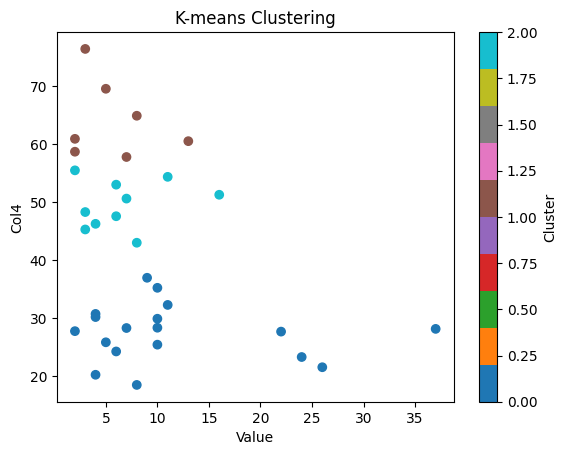

In [35]:
X = filtered_df[['Value']]
y = filtered_df['Col4']

kmeans = KMeans(n_clusters=3, random_state=77)
kmeans.fit(X)

# 클러스터 할당
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

plt.scatter(y, X, c=cluster_labels, cmap='tab10')
plt.xlabel('Value')
plt.ylabel('Col4')
plt.title('K-means Clustering')
plt.colorbar(label='Cluster')
plt.show()

In [36]:
# 각 클러스터에 속한 데이터 포인트 출력 및 'Col4' 열의 평균 값 계산
for i in range(len(cluster_centers)):
    cluster_points = filtered_df[cluster_labels == i]
    # print(f'\nCluster {i}에 속한 데이터 포인트:')
    # print(cluster_points)

    # 'Col4' 열의 평균 값 계산 및 출력
    sum_data = 0
    count = 0
    for data in cluster_points['Col4'].values:
      sum_data += float(data)
      count += 1
    mean_col4 = np.round(sum_data/count, 4)
    print(f'Cluster {i}의 "Col4" 열 평균 값: {mean_col4}')

Cluster 0의 "Col4" 열 평균 값: 11.6111
Cluster 1의 "Col4" 열 평균 값: 5.7143
Cluster 2의 "Col4" 열 평균 값: 6.6


#### 결론

출산율 데이터는 'Col4(청소년 출산빈도)' 열을 하나만 남기고 주로 진행하였다. 그 이유는 고용률과 상관계수가 높게 나왔기 때문이기도 하고, 15-24세의 고용률을 비교하는 만큼 청소년 출산 빈도와 더 높은 연관성을 가질 것이라 생각했기 때문이다.

분석 결과로는 처음 세웠던 가설과는 반대로, value(15-24세 고용률)가 올라가면 출산 빈도가 떨어지는 경향을 보였다.

클러스터링을 진행한 결과는 군집 수에 따라 값이 다르긴 하지만, 비교적 아래쪽에 위치한 그룹들이 넓게 퍼져 있는 것을 확인할 수 있었다. 또한, 고용률이 10% 정도가 되는 나라들에서 나타나는 출산빈도가 폭이 매우 컸다.

즉, 고용률 만으로는 출산율을 설명하기는 한계가 있는 것으로 보인다.



### **가설 3) 대기업과 중소기업 소득 차이가 커질수록 출산율이 낮을 것이다.**

통계청에서 제공하는 '기업규모별 연령대별 소득' 2016년-2022년의 데이터를 활용하였다.

#### Data preparation

##### 기업 규모별, 연령대별 소득 (new_df_transpose)

In [37]:
income_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/24-1전공교과/응용데이터분석/Term_project1/기업규모별_연령대별_소득_20240523145747.csv', encoding='UTF-8')
income_df = income_df.iloc[:49]
income_df.head(3)

,기업규모별(1),기업규모별(2),연령대별(1),2016,2016.1,2017,2017.1,2018,2018.1,2019,2019.1,2020,2020.1,2021,2021.1,2022,2022.1
0,기업규모별(1),기업규모별(2),연령대별(1),평균소득,중위소득,평균소득,중위소득,평균소득,중위소득,평균소득,중위소득,평균소득,중위소득,평균소득,중위소득,평균소득,중위소득
1,총 계,소계,총 계,277,203,287,210,297,220,309,234,320,242,333,250,353,267
2,총 계,소계,19세 이하,74,54,74,50,78,50,84,52,96,61,89,56,92,58


In [38]:
# "총 계"를 포함하는 행의 인덱스 찾기
index_list = income_df[income_df["연령대별(1)"] == "총 계"].index
print(index_list)

dfs = []

# 각 "총 계" 행을 기준으로 아래 12개 행씩 잘라서 새로운 데이터프레임 생성
for idx in index_list:
    new_df = income_df.iloc[idx:idx+12]
    dfs.append(new_df)

# 새로운 데이터프레임 확인
for i, df in enumerate(dfs):
    if i == 2 or i==3:
      print(f"DataFrame {i+1}:")
      print(df)
      print()

Index([1, 13, 25, 37], dtype='int64')
DataFrame 3:
   기업규모별(1) 기업규모별(2) 연령대별(1) 2016 2016.1 2017 2017.1 2018 2018.1 2019 2019.1  \
25     영리기업      대기업     총 계  476    406  488    417  501    425  515    438   
26     영리기업      대기업  19세 이하   95     71   92     68  102     74  110     84   
27     영리기업      대기업  20~24세  184    162  179    160  184    168  198    190   
28     영리기업      대기업  25~29세  319    303  320    302  326    306  335    319   
29     영리기업      대기업  30~34세  414    397  424    406  436    416  440    420   
30     영리기업      대기업  35~39세  503    480  513    486  525    495  532    502   
31     영리기업      대기업  40~44세  579    550  588    555  605    567  612    577   
32     영리기업      대기업  45~49세  640    619  655    621  669    628  675    630   
33     영리기업      대기업  50~54세  676    635  689    638  697    649  703    654   
34     영리기업      대기업  55~59세  590    456  607    494  613    500  635    527   
35     영리기업      대기업  60~64세  411    197  418    210  431    233  455

In [39]:
df1_sub = dfs[2].iloc[:, 3:] # 대기업 통계
df2_sub = dfs[3].iloc[:, 3:] # 중소기업 통계

def convert_to_numeric(df):
    for col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

# 데이터프레임을 숫자로 변환
df1_sub = convert_to_numeric(df1_sub)
df2_sub = convert_to_numeric(df2_sub)

# 데이터 타입 출력
# print("Data types of df1 after conversion:")
# print(df1.dtypes)
# print("\nData types of df2 after conversion:")
# print(df2.dtypes)

<ipython-input-39-be212085cb8a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')


In [40]:
# 새로운 데이터프레임 df3_sub 생성
rows, cols = df1_sub.shape  # 행과 열의 개수 가져오기
df3_sub = pd.DataFrame(index=range(rows), columns=range(cols))  # 행과 열의 개수만큼 빈 데이터프레임 생성

# 각 행과 열의 좌표를 이용하여 값들을 하나씩 빼고 저장
for i in range(rows):
    for j in range(cols):
        df3_sub.iloc[i, j] = df1_sub.iloc[i, j] - df2_sub.iloc[i, j]

df3_sub

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,263,234,265,237,270,237,270,237,270,235,297,247,305,253
1,27,22,24,21,31,28,33,35,9,11,21,28,18,19
2,62,37,51,30,51,23,52,21,50,17,58,18,59,19
3,138,123,132,115,129,112,124,110,122,107,139,113,143,117
4,193,186,196,188,200,191,190,181,186,172,209,182,214,186
5,257,259,259,256,263,257,255,252,254,245,288,266,300,282
6,327,345,325,337,331,341,324,335,323,325,360,339,370,351
7,395,429,398,421,400,422,391,410,383,387,419,397,428,411
8,439,455,438,449,438,455,431,449,428,445,461,451,476,457
9,368,292,369,319,370,320,379,332,374,331,401,342,416,353


In [41]:
# 20대만 고려하기 위해서 df3_sub의 2,3번째 행만 사용함.
df3_sub_selected = df3_sub.iloc[1:3]  # Python의 인덱스는 0부터 시작하므로 2번째 행은 1, 3번째 행은 2에 해당
print(df3_sub_selected)

   0   1   2   3   4   5   6   7   8   9   10  11  12  13
1  27  22  24  21  31  28  33  35   9  11  21  28  18  19
2  62  37  51  30  51  23  52  21  50  17  58  18  59  19


평균 소득과 중위소득이 비슷한 값을 가질 수 있기에, 두 feature를 평균내어 각 연도당 하나의 값만 가지도록 한다.

In [42]:
new_df = pd.DataFrame()

# 열 쌍별 평균을 계산하여 새로운 데이터프레임에 추가
for i in range(0, len(df3_sub_selected.columns), 2):
    col1 = df3_sub_selected.iloc[:, i]
    col2 = df3_sub_selected.iloc[:, i+1]
    new_col = (col1 + col2) / 2
    new_df[f'avg_{i+1}_{i+2}'] = new_col

print(new_df)

  avg_1_2 avg_3_4 avg_5_6 avg_7_8 avg_9_10 avg_11_12 avg_13_14
1    24.5    22.5    29.5    34.0     10.0      24.5      18.5
2    49.5    40.5    37.0    36.5     33.5      38.0      39.0


In [43]:
# 출산율 데이터와 통합을 위해 transpose
new_df_transpose = new_df.transpose()
new_df_transpose

,1,2
avg_1_2,24.5,49.5
avg_3_4,22.5,40.5
avg_5_6,29.5,37.0
avg_7_8,34.0,36.5
avg_9_10,10.0,33.5
avg_11_12,24.5,38.0
avg_13_14,18.5,39.0


##### 한국 출산율 데이터(new_df_selected_columns)

In [44]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/24-1전공교과/응용데이터분석/Term_project1/전체_모연령별출산율.csv",encoding='utf-8')

selected_df = df.iloc[:, 1:]
df = selected_df.iloc[[1]]

years = sorted(set([col.split('.')[0] for col in df.columns]))
# print(years)

new_df = pd.DataFrame(np.array_split(df.values.flatten(), 30))

new_df.columns = ['total', '15-19', '20-24', '25-29','30-34','35-39','40-44','45-49']

출산율 데이터는 1993년부터 2022년까지 수집된 데이터이므로, 밑에서부터 7개의 행을 사용하여 데이터를 통합할 수 있다.

In [45]:
# new_df의 밑에서부터 7번째 행까지 선택
new_df_selected = new_df.iloc[-7:]
print(new_df_selected)

    total 15-19 20-24 25-29  30-34 35-39 40-44 45-49
23  1.172   1.3  11.5  56.4  110.1  48.7   5.9   0.2
24  1.052   1.0   9.6  47.9   97.7  47.2   6.0   0.2
25  0.977   0.9   8.2  41.0   91.4  46.1   6.4   0.2
26  0.918   0.8   7.1  35.7   86.2  45.0   7.0   0.2
27  0.837   0.7   6.2  30.6   78.9  42.3   7.1   0.2
28  0.808   0.4   5.0  27.5   76.1  43.5   7.6   0.2
29  0.778   0.4   4.1  24.0   73.5  44.1   8.0   0.2


그리고 현재 20-34까지의 데이터를 사용할 예정이므로 연령대를 동일하게 맞추어 데이터를 선별하였다. 소득 차이 데이터프레임과 연령 범위가 다른 이유는 취업 이후에도 결혼 및 출산까지에 걸리는 시간이 필요하다고 생각하여 그 점을 감안하였다.





In [46]:
# new_df_selected의 0, 2, 3, 4번째 열만 선택
new_df_selected_columns = new_df_selected.iloc[:, [0, 2, 3, 4]]
print(new_df_selected_columns)

    total 20-24 25-29  30-34
23  1.172  11.5  56.4  110.1
24  1.052   9.6  47.9   97.7
25  0.977   8.2  41.0   91.4
26  0.918   7.1  35.7   86.2
27  0.837   6.2  30.6   78.9
28  0.808   5.0  27.5   76.1
29  0.778   4.1  24.0   73.5


##### 데이터 통합

In [47]:
combined_df = pd.concat([new_df_transpose, new_df_selected_columns], axis=1, ignore_index=True)
# combined_df

두 데이터프레임을 합치려고 하였으나 오류가 발생해서 직접 값들을 다시 데이터프레임으로 구성하여 만들었다.

In [48]:
data = {
    'emp_20_24': [24.5, 22.5, 29.5, 34.0, 10.0, 24.5, 18.5],
    'emp_25_29': [49.5, 40.5, 37.0, 36.5, 33.5, 38.0, 39.0],
    'total': [1.172, 1.052, 0.977, 0.918, 0.837, 0.808, 0.778],
    'fer_20_24': [11.5, 9.6, 8.2, 7.1, 6.2, 5.0, 4.1],
    'fer_25_29': [56.4, 47.9, 41.0, 35.7, 30.6, 27.5, 24.0],
    'fer_30_34': [110.1, 97.7, 91.4, 86.2, 78.9, 76.1, 73.5]
}

index = ['2016', '2017', '2018', '2019', '2020', '2021', '2022']
df = pd.DataFrame(data, index=index)
df['fer_20_34'] = df['fer_20_24'] + df['fer_25_29'] + df['fer_30_34']
print(df)

      emp_20_24  emp_25_29  total  fer_20_24  fer_25_29  fer_30_34  fer_20_34
2016       24.5       49.5  1.172       11.5       56.4      110.1      178.0
2017       22.5       40.5  1.052        9.6       47.9       97.7      155.2
2018       29.5       37.0  0.977        8.2       41.0       91.4      140.6
2019       34.0       36.5  0.918        7.1       35.7       86.2      129.0
2020       10.0       33.5  0.837        6.2       30.6       78.9      115.7
2021       24.5       38.0  0.808        5.0       27.5       76.1      108.6
2022       18.5       39.0  0.778        4.1       24.0       73.5      101.6


#### EDA

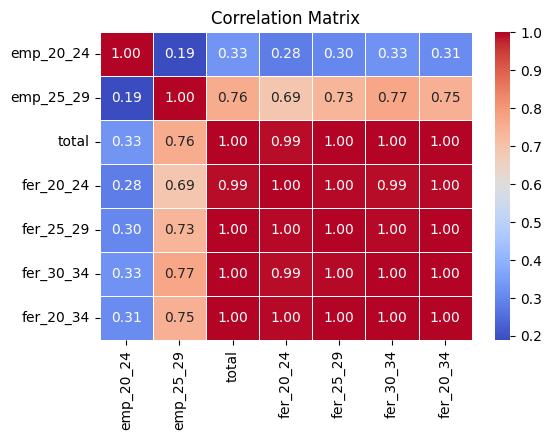

In [49]:
corr_matrix = df.corr()

# 상관 계수 행렬 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

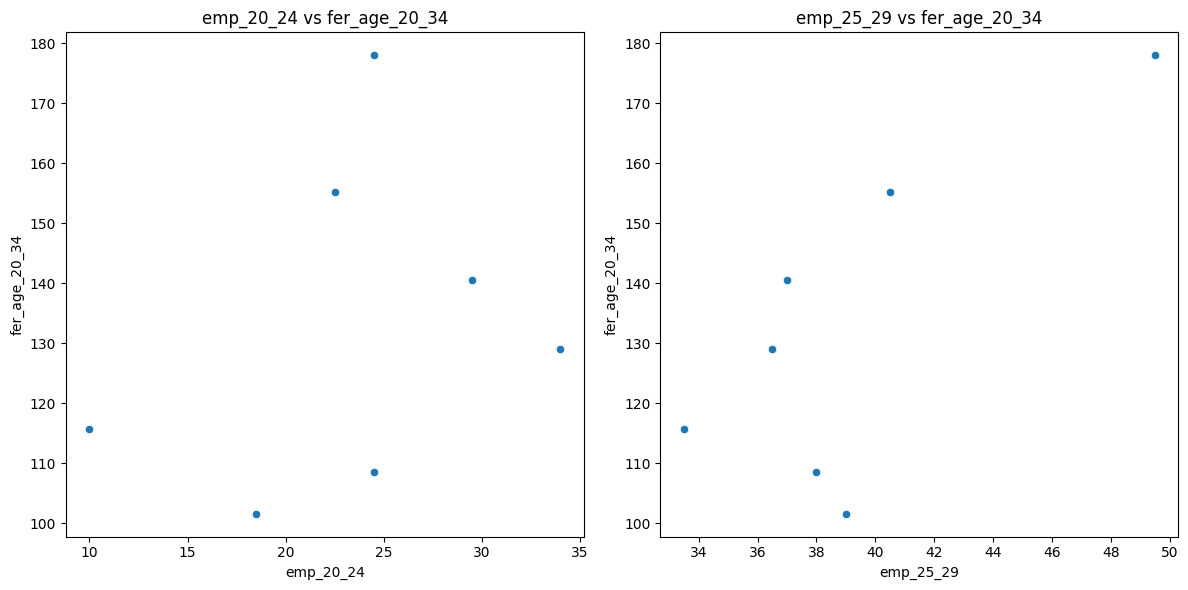

In [50]:
plt.figure(figsize=(12, 6))

# 'emp_20_24'에 대한 시각화
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['emp_20_24'], y=df['fer_20_34'])
plt.xlabel('emp_20_24')
plt.ylabel('fer_age_20_34')
plt.title('emp_20_24 vs fer_age_20_34')

# 'emp_25_29'에 대한 시각화
plt.subplot(1, 2, 2)
sns.scatterplot(x=df['emp_25_29'], y=df['fer_20_34'])
plt.xlabel('emp_25_29')
plt.ylabel('fer_age_20_34')
plt.title('emp_25_29 vs fer_age_20_34')

plt.tight_layout()
plt.show()

데이터의 상관계수들을 구하고 데이터의 분포를 시각화해본 결과, 25-29세의 대기업-중소기업간 소득 차이가 20-24세의 소득 차이보다 더 높은 상관계수 값을 가지고(0.7 정도), 데이터의 분포 역시 어느정도 선형적인 패턴을 가지는 것으로 보이기 때문에, 회귀를 진행할때에는 25-29세의 소득 차이를 독립변수로 사용하였다.

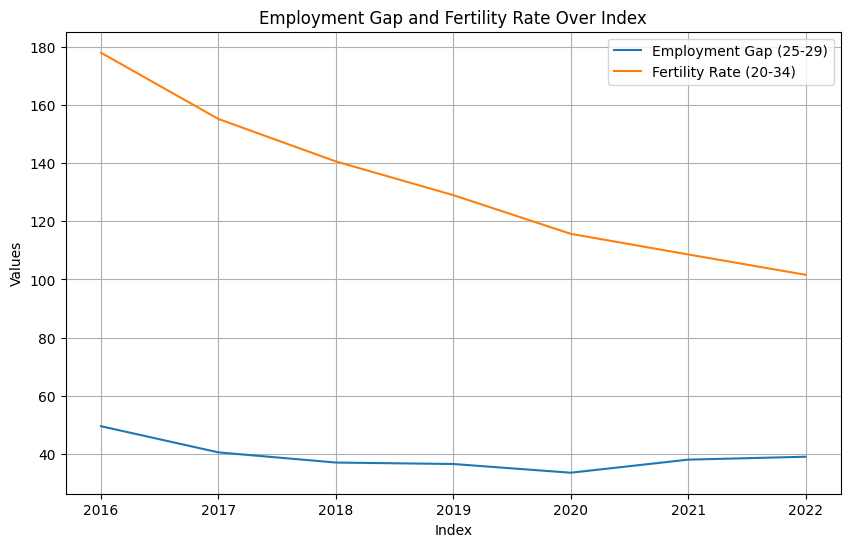

In [60]:
# 시계열데이터 시각화
plt.figure(figsize=(10, 6))
plt.plot(df['emp_25_29'], label='Employment Gap (25-29)')
plt.plot(df['fer_20_34'], label='Fertility Rate (20-34)')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Employment Gap and Fertility Rate Over Index')
plt.legend()
plt.grid(True)
plt.show()

#### Regression

In [61]:
X = df[['emp_25_29']]
y = df[['fer_20_34']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 회귀 모델 생성 및 훈련
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# 테스트 데이터에 대한 예측값 출력
print(f'\nPredictions: \n{y_pred}\n')
print(f'Real: \n{y_test.values}')

Mean Squared Error: 4785.125338718306
R² Score: -35.81998567804172

Predictions: 
[[ 90.80028902]
 [110.85520231]]

Real: 
[[178. ]
 [155.2]]


In [62]:
# statsmodels를 사용한 회귀 분석 및 통계 검정
X_train_sm = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_sm).fit()

# 회귀 분석 결과 출력 (t-검정 값 포함)
print(ols_model.summary())

# statsmodels를 사용하여 테스트 데이터 예측
X_test_sm = sm.add_constant(X_test)
y_pred_sm = ols_model.predict(X_test_sm)

                            OLS Regression Results                            
Dep. Variable:              fer_20_34   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                 -0.217
Method:                 Least Squares   F-statistic:                    0.2856
Date:                Sat, 25 May 2024   Prob (F-statistic):              0.630
Time:                        07:12:53   Log-Likelihood:                -20.084
No. Observations:                   5   AIC:                             44.17
Df Residuals:                       3   BIC:                             43.39
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        201.1023    153.646      1.309      0.2

- 마지막 행을 제외한 전체 데이터로 학습

In [63]:
# 마지막 행을 분리
import warnings
warnings.filterwarnings('ignore')

last_row = df.iloc[-1]
df_remaining = df.iloc[:-1]

X = df_remaining[['emp_25_29']]
y = df_remaining[['fer_20_34']]

model = LinearRegression()
model.fit(X, y)

# 마지막 행 예측
last_row_X = last_row[['emp_25_29']].values.reshape(1, -1)
last_row_y_pred = model.predict(last_row_X)

print(f'Predicted age_20_34 for the last row: {last_row_y_pred[0]}')
print(f'Actual age_20_34 for the last row: {last_row["fer_20_34"]}')

Predicted age_20_34 for the last row: [137.18336945]
Actual age_20_34 for the last row: 101.6


#### Visualize

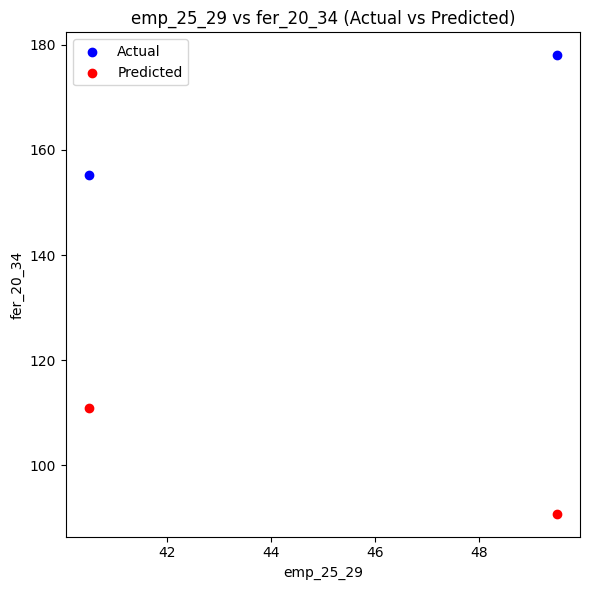

In [64]:
# 결과 시각화
plt.figure(figsize=(6, 6))

# 'emp_25_29'에 대한 실제 vs 예측
plt.scatter(X_test['emp_25_29'], y_test, color='blue', label='Actual')
plt.scatter(X_test['emp_25_29'], y_pred, color='red', label='Predicted')
plt.xlabel('emp_25_29')
plt.ylabel('fer_20_34')
plt.title('emp_25_29 vs fer_20_34 (Actual vs Predicted)')
plt.legend()

plt.tight_layout()
plt.show()

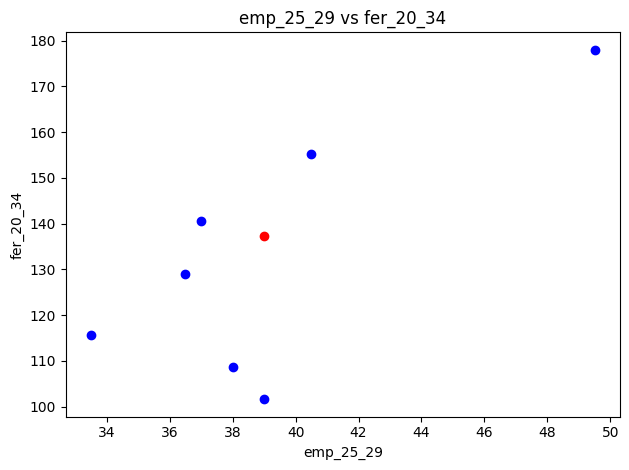

In [65]:
# 'avg_3_4'에 대한 시각화
plt.scatter(df['emp_25_29'], df['fer_20_34'], color='blue', label='Actual')
plt.scatter(df['emp_25_29'][-1], last_row_y_pred, color='red', label='Predicted')
plt.xlabel('emp_25_29')
plt.ylabel('fer_20_34')
plt.title('emp_25_29 vs fer_20_34')

plt.tight_layout()
plt.show()

#### 결론

25-29세의 소득격차와 20-34세의 출산율을 회귀 분석을 진행하고 이를 시각화해본 결과, test set에 대한 모델의 예측값은 소득 차이가 작을 수록 출산율이 높다고 예측한 반면, 실제 값은 소득차이가 커질수록 출산율이 높아진다는 결과를 제시하였다.


### **소주제 1 결론**

청년층(20-30대)의 사회 진출이 늦어질수록 출산율이 낮아질 것이라는 소주제에 따라 각각의 가설을 분석해보았다.

<br>

**1) 국회의원의 평균 연령이 높을수록 출산율이 낮을 것이다.**

국민을 대표하는 국회의원이 어느정도 대표성을 가진다고 고려할때, 국회의원의 평균 연령이 높을 수록 청년층의 사회 진출 연령에 영향을 미칠 것이라 추측했다.

하지만 상관관계와 회귀를 통해 확인한 결과, 국회의원의 연령은 출산율과 큰 관련성을 보이지 않았다.

그 이유를 생각해보면, 국회의원이 국민들을 제대로 대표하고 있지 않기 때문일 수 있다. 실제로 한국의 경우 국회의원은 사회의 평균 보다 더 나이가 많고, 재산 역시 훨씬 많으며, 남녀 성비가 남성 쪽으로 치우쳐져 있다.([내용 출처](https://www.hankookilbo.com/News/Read/A2023072609500002174)) 그런 면에서 현재 사회에 분포된 집단을 제대로 표현하지 못할 수 있겠다라는 생각을 해볼 수 있다.

다만 선형 회귀 모델이 예측한 값을 살펴보면, 국회의원의 나이가 증가하면 대체로 출산율도 내려가도록 보이는 경향이 학습 되었다. 이를 보아 어느정도는 관련이 있을 수 있겠다라는 가능성을 보인다. 즉, 국회의원이 사회를 제대로 반영하고 있지 않다고 해도 국회의원의 연령층이 높다는 것은 오히려 기득권을 차지하고 있는 연령층의 비율을 어느정도 파악할 수 있는 셈이고, 이에 따라 연령층이 높을 수록 기존의 청년들이 설 자리가 부족하기 때문에 출산율이 내려간다고도 해석할 수 있을 것 같다.

즉, 청년들의 사회진출을 돕기 위해 기존의 사회 구조에 변화를 줄 필요가 있을 것이다.

<br>

**2) 15-24세 고용률이 높을수록 출산율이 높을 것이다.**

15-24세의 고용률이 높으면 비슷한 연령대의 출산 빈도가 높을 것으로 예상했으나, 고용률과 출산빈도는 큰 관련을 보이지 못했다.

연령대별 세부적인 데이터가 부족했을 뿐 아니라 해당 나라의 경제적. 산업적, 문화적인 형태에 따라서도 출산 빈도에 영향을 미치고 있는 만큼 다각도에서 분석을 해볼 필요성을 느꼈다.

<br>

**3) 대기업과 중소기업 소득 차이가 커질수록 출산율이 낮을 것이다.**

가설과는 반대로, 대기업과 중소기업 소득 차이가 커질수록 출산율이 올라가는 현상을 보였다. 다만 테스트셋에 대해서 시각화 했을 때는 이와 반대의 결과가 보이긴 했으나 이는 test set이 너무 작기 때문이라 생각한다.

실제로 모델이 맨 마지막 행에 대해서 예측한(2022의 데이터) 결과를 보면 어느정도는 기존의 데이터 패턴 속에서 잘 예측한 것을 볼 수 있었다.

분석 결과가 이렇게 나온 이유에는 실제로 가설이 틀렸을 가능성도 있지만, 2020년에 발생했던 COVID-19의 영향으로 중소기업들의 매출 저하로 인한 임금 감소 때문에 소득 차이가 커진 이후, 다시 임금 차이가 회복되는 과정에서 발생한 데이터의 패턴에 영향을 받았을 수도 있다고 생각한다.

또한, 시계열적인 데이터임에도 시간을 제외하고 분석을 진행했다는 점에서도 결과에 영향을 미쳤으리라 생각한다.

<br>

- **총 정리**

'청년층의 사회 진출에 따른 출산율'에 대해 알아보기 위해 총 3가지의 가설을 가지고 이를 검증해보았다. 전반적으로 분석 결과가 가설과 맞지 않는 부분들이 많아 아쉬웠다.

다만 이는 세부적인 데이터가 부족했다는 점과 단편적인 출산율의 수치만을 사용했다는 점, 그리고 더 다양한 사회-경제-문화적 요인을 고려하지 못했다는 점에서 분석의 한계가 있었다고 생각한다.

그렇기에 해당 결과만으로 청년층의 사회 진출에 따른 출산율이 영향이 없다, 라고 결론짓기는 섣부르다고 생각한다.

## 2. 아이를 키우는 환경(가치관)에 따른 출산율

### 가설 4) 사회 전반적인 가치관이 출산율에 영향을 줄 것이다.(나라별 비교)

각 나라별로 중요하게 생각하는 것, 추구하는 가치 등 다양한 면에서 가치관이 차이를 나타낸다. 이는 WVS 데이터를 통해 확인할 수 있는데, WVS는 World Values Survey라고 하며, 세계에서 일어나고 있는 사회/문화/정치적 변화를 연구하는 조사로써 각 국가 사람들의 삶과 가치가 어떻게 변화하고 있는가를 탐구하기 위한 것이다.([설명 출처](https://www.ksdc.re.kr/bbs/content.php?co_id=global))

이 데이터를 통해 사회 구성원의 전반적인 생각을 엿볼 수 있고, 더 나아가 가치관이 과연 출산율에 영향을 미칠 것인가에 대해서도 알아보고자 한다.

#### Data preparation

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/24-1전공교과/응용데이터분석/Term_project1/WVS_Cross-National_Wave_7_csv_v5_0.csv")

df.drop(columns=['version', 'doi', 'A_WAVE', 'A_STUDY'], inplace=True)
df.head(5)

,A_YEAR,B_COUNTRY,B_COUNTRY_ALPHA,C_COW_NUM,C_COW_ALPHA,D_INTERVIEW,S007,J_INTDATE,FW_END,FW_START,...,WVS_Polmistrust_PartyVoter,WVS_LR_MedianVoter,WVS_LibCon_MedianVoter,v2psbars,v2psorgs,v2psprbrch,v2psprlnks,v2psplats,v2xnp_client,v2xps_party
0,2018,20,AND,232,AND,20070001,20720001,20180704,201809,201807,...,62.434211,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,2018,20,AND,232,AND,20070002,20720002,20180714,201809,201807,...,62.434211,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,2018,20,AND,232,AND,20070003,20720003,20180704,201809,201807,...,62.434211,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
3,2018,20,AND,232,AND,20070004,20720004,20180702,201809,201807,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,20,AND,232,AND,20070005,20720005,20180708,201809,201807,...,66.964286,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0


In [67]:
unique_countries = df['B_COUNTRY_ALPHA'].unique()
print(unique_countries)

['AND' 'ARG' 'AUS' 'BGD' 'ARM' 'BOL' 'BRA' 'MMR' 'CAN' 'CHL' 'CHN' 'TWN'
 'COL' 'CYP' 'CZE' 'ECU' 'ETH' 'DEU' 'GRC' 'GTM' 'HKG' 'IDN' 'IRN' 'IRQ'
 'JPN' 'KAZ' 'JOR' 'KEN' 'KOR' 'KGZ' 'LBN' 'LBY' 'MAC' 'MYS' 'MDV' 'MEX'
 'MNG' 'MAR' 'NLD' 'NZL' 'NIC' 'NGA' 'PAK' 'PER' 'PHL' 'PRI' 'ROU' 'RUS'
 'SRB' 'SGP' 'SVK' 'VNM' 'ZWE' 'TJK' 'THA' 'TUN' 'TUR' 'UKR' 'EGY' 'GBR'
 'USA' 'URY' 'VEN' 'NIR']


WVS 데이터의 각 Question에 객관식으로 답한 결과가 나와있다. 이때 모든 항목을 고려하기는 어려우므로, 각 항목에서 가장 첫번째 값(가장 좋거나, 가장 나쁘거나)의 비율을 나타내어 데이터 분석에 사용하였다.

In [68]:
# B_COUNTRY_ALPHA를 기준으로 그룹화하여, 각 그룹에서 Q1이 1인 행의 비율 계산
result_df = df.groupby('B_COUNTRY_ALPHA').apply(lambda x: (x['Q1'] == 1).sum() / len(x)).reset_index(name='Q1_ratio')
print(result_df)

   B_COUNTRY_ALPHA  Q1_ratio
0              AND  0.895418
1              ARG  0.909272
2              ARM  0.954211
3              AUS  0.902372
4              BGD  0.985833
..             ...       ...
59             URY  0.909000
60             USA  0.892142
61             VEN  0.834454
62             VNM  0.968333
63             ZWE  0.961317

[64 rows x 2 columns]


In [69]:
# 결과를 저장할 빈 데이터프레임 초기화
result_df = pd.DataFrame({'B_COUNTRY_ALPHA': df['B_COUNTRY_ALPHA'].unique()})

# Q1부터 Q259까지의 비율 계산
for i in range(1, 260):
    column = f'Q{i}'
    ratio_series = df.groupby('B_COUNTRY_ALPHA').apply(lambda x: (x[column] == 1).sum() / len(x)).reset_index(name=f'{column}_ratio')
    result_df = result_df.merge(ratio_series, on='B_COUNTRY_ALPHA')

# 결과 출력
print(result_df)

   B_COUNTRY_ALPHA  Q1_ratio  Q2_ratio  Q3_ratio  Q4_ratio  Q5_ratio  \
0              AND  0.895418  0.548805  0.629482  0.077689  0.568725   
1              ARG  0.909272  0.568295  0.371884  0.095713  0.612164   
2              AUS  0.902372  0.552124  0.413127  0.110866  0.301158   
3              BGD  0.985833  0.251667  0.159167  0.054167  0.798333   
4              ARM  0.954211  0.439084  0.395748  0.219133  0.763696   
..             ...       ...       ...       ...       ...       ...   
59             GBR  0.910310  0.634726  0.500192  0.159448  0.352626   
60             USA  0.892142  0.479969  0.387904  0.139445  0.378274   
61             URY  0.909000  0.507000  0.545000  0.183000  0.714000   
62             VEN  0.834454  0.357983  0.436134  0.095798  0.644538   
63             NIR  0.937360  0.671141  0.483221  0.131991  0.342282   

    Q6_ratio  Q7_ratio  Q8_ratio  Q9_ratio  ...  Q250_ratio  Q251_ratio  \
0   0.094622  0.848606  0.468127  0.440239  ...    0.001992 

또한, 데이터에 나타난 모든 나라를 고려하는 것은 표기 방식이 다른 관계로 한계가 있어서, 경제적으로 비슷한 상황을 가정하기 위해 GDP 순위 18위까지의 나라만을 고려하였다.

In [70]:
# 필요한 국가 목록
desired_countries = ['USA', 'CHN', 'JPN', 'GMY','UKG','FRN','RUS','CAN','ITA','BRA','AUL','KOR','MEX','SPN','INS','NTH','TUR','SWZ']

# 해당 국가들만 선택하여 새로운 데이터프레임 생성
filtered_df = result_df[result_df['B_COUNTRY_ALPHA'].isin(desired_countries)]

# 결과 출력
print(filtered_df)

   B_COUNTRY_ALPHA  Q1_ratio  Q2_ratio  Q3_ratio  Q4_ratio  Q5_ratio  \
6              BRA  0.852440  0.385358  0.350738  0.162316  0.608967   
8              CAN  0.796416  0.492534  0.518168  0.124191  0.328522   
10             CHN  0.860343  0.354743  0.213439  0.155138  0.432148   
24             JPN  0.920177  0.404287  0.444937  0.150037  0.382853   
28             KOR  0.889157  0.400000  0.240964  0.079518  0.426506   
35             MEX  0.970706  0.372774  0.602527  0.161976  0.797243   
47             RUS  0.835359  0.416022  0.376243  0.124862  0.409945   
56             TUR  0.917598  0.616563  0.543685  0.209110  0.459213   
60             USA  0.892142  0.479969  0.387904  0.139445  0.378274   

    Q6_ratio  Q7_ratio  Q8_ratio  Q9_ratio  ...  Q250_ratio  Q251_ratio  \
6   0.454597  0.729285  0.265040  0.554484  ...    0.038593    0.360953   
8   0.157043  0.521901  0.494276  0.458188  ...    0.005475    0.019413   
10  0.037879  0.835968  0.777009  0.711133  ...    0.0

In [71]:
filtered_df.to_csv('out.csv', index=False)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/24-1전공교과/응용데이터분석/Term_project1/out.csv')
df = df.drop(columns=['Unnamed: 0'])
df

,B_COUNTRY_ALPHA,Q1_ratio,Q2_ratio,Q3_ratio,Q4_ratio,Q5_ratio,Q6_ratio,Q7_ratio,Q8_ratio,Q9_ratio,...,Q250_ratio,Q251_ratio,Q252_ratio,Q253_ratio,Q254_ratio,Q255_ratio,Q256_ratio,Q257_ratio,Q258_ratio,Q259_ratio
0,BRA,0.852440,0.385358,0.350738,0.162316,0.608967,0.454597,0.729285,0.265040,0.554484,...,0.038593,0.360953,0.578320,0.041430,0.245743,0.242906,0.180477,0.175369,0.057889,0.081158
1,CAN,0.796416,0.492534,0.518168,0.124191,0.328522,0.157043,0.521901,0.494276,0.458188,...,0.005475,0.019413,0.059731,0.236187,0.498009,0.364609,0.314833,0.440020,0.164510,0.092334
2,CHN,0.860343,0.354743,0.213439,0.155138,0.432148,0.037879,0.835968,0.777009,0.711133,...,0.005599,0.021410,0.011858,0.304018,0.434124,0.315547,0.188406,0.370553,0.080698,0.078063
3,JPN,0.920177,0.404287,0.444937,0.150037,0.382853,0.045824,0.840355,0.602365,0.250554,...,0.002956,0.006652,0.037694,0.062823,0.326681,0.399113,0.237251,0.354028,0.039911,0.027347
4,KOR,0.889157,0.400000,0.240964,0.079518,0.426506,0.102811,0.742169,0.604016,0.608835,...,0.000000,0.001606,0.002410,0.049799,0.099598,0.390361,0.367068,0.360643,0.037751,0.022490
5,MEX,0.970706,0.372774,0.602527,0.161976,0.797243,0.508329,0.863871,0.329696,0.394601,...,0.024698,0.174038,0.260195,0.106835,0.726020,0.586445,0.531304,0.603676,0.217691,0.265365
6,RUS,0.835359,0.416022,0.376243,0.124862,0.409945,0.179558,0.586188,0.345304,0.756354,...,0.024862,0.054144,0.070166,0.119337,0.441989,0.448619,0.322099,0.324862,0.033702,0.063536
7,TUR,0.917598,0.616563,0.543685,0.209110,0.459213,0.600000,0.800414,0.296480,0.622774,...,0.008696,0.035197,0.036025,0.166046,0.610352,0.484472,0.360663,0.413251,0.067081,0.069565
8,USA,0.892142,0.479969,0.387904,0.139445,0.378274,0.330894,0.496148,0.552388,0.682974,...,0.011556,0.045840,0.172958,0.119800,0.413713,0.232280,0.195300,0.280046,0.137519,0.108243


그리고 정리된 WVS 데이터를 출산율 데이터(fer_df)와 합쳤다.

In [72]:
fer_wvs_df = pd.merge(fer_df, df, left_on='Country', right_on='B_COUNTRY_ALPHA', how='inner')
del fer_wvs_df['B_COUNTRY_ALPHA']
fer_wvs_df.to_csv('merged.csv', index=False)
fer_wvs_df

,Country,1990,2021,Col4,Q1_ratio,Q2_ratio,Q3_ratio,Q4_ratio,Q5_ratio,Q6_ratio,...,Q250_ratio,Q251_ratio,Q252_ratio,Q253_ratio,Q254_ratio,Q255_ratio,Q256_ratio,Q257_ratio,Q258_ratio,Q259_ratio
0,BRA,2.9,1.6,45,0.852440,0.385358,0.350738,0.162316,0.608967,0.454597,...,0.038593,0.360953,0.578320,0.041430,0.245743,0.242906,0.180477,0.175369,0.057889,0.081158
1,CAN,1.8,1.4,7,0.796416,0.492534,0.518168,0.124191,0.328522,0.157043,...,0.005475,0.019413,0.059731,0.236187,0.498009,0.364609,0.314833,0.440020,0.164510,0.092334
2,CHN,2.5,1.2,11,0.860343,0.354743,0.213439,0.155138,0.432148,0.037879,...,0.005599,0.021410,0.011858,0.304018,0.434124,0.315547,0.188406,0.370553,0.080698,0.078063
3,JPN,1.5,1.3,3,0.920177,0.404287,0.444937,0.150037,0.382853,0.045824,...,0.002956,0.006652,0.037694,0.062823,0.326681,0.399113,0.237251,0.354028,0.039911,0.027347
4,KOR,1.6,0.8,2,0.889157,0.400000,0.240964,0.079518,0.426506,0.102811,...,0.000000,0.001606,0.002410,0.049799,0.099598,0.390361,0.367068,0.360643,0.037751,0.022490
5,MEX,3.5,1.8,54,0.970706,0.372774,0.602527,0.161976,0.797243,0.508329,...,0.024698,0.174038,0.260195,0.106835,0.726020,0.586445,0.531304,0.603676,0.217691,0.265365
6,RUS,1.9,1.5,15,0.835359,0.416022,0.376243,0.124862,0.409945,0.179558,...,0.024862,0.054144,0.070166,0.119337,0.441989,0.448619,0.322099,0.324862,0.033702,0.063536
7,USA,2.1,1.7,16,0.892142,0.479969,0.387904,0.139445,0.378274,0.330894,...,0.011556,0.045840,0.172958,0.119800,0.413713,0.232280,0.195300,0.280046,0.137519,0.108243


#### EDA

In [73]:
corr_matrix = fer_wvs_df.iloc[:, 4:].corr()
corr_matrix

,Q1_ratio,Q2_ratio,Q3_ratio,Q4_ratio,Q5_ratio,Q6_ratio,Q7_ratio,Q8_ratio,Q9_ratio,Q10_ratio,...,Q250_ratio,Q251_ratio,Q252_ratio,Q253_ratio,Q254_ratio,Q255_ratio,Q256_ratio,Q257_ratio,Q258_ratio,Q259_ratio
Q1_ratio,1.000000,-0.444028,0.297259,0.274229,0.618331,0.347244,0.627923,-0.021886,-0.440213,0.303076,...,0.017356,0.090195,0.087925,-0.428754,0.252835,0.484454,0.465731,0.445849,0.276646,0.508519
Q2_ratio,-0.444028,1.000000,0.318264,-0.317076,-0.581470,-0.034284,-0.889069,-0.041219,0.013514,-0.734860,...,-0.245773,-0.320571,-0.168074,0.081064,0.040230,-0.303212,-0.135988,-0.102737,0.267449,-0.129013
Q3_ratio,0.297259,0.318264,1.000000,0.351020,0.388721,0.504684,-0.071963,-0.533905,-0.639081,-0.687778,...,0.242599,0.171792,0.204220,-0.118457,0.722450,0.548275,0.567531,0.595829,0.715692,0.674470
Q4_ratio,0.274229,-0.317076,0.351020,1.000000,0.486270,0.447855,0.342800,-0.230716,-0.270495,-0.285125,...,0.516706,0.536853,0.538062,0.155149,0.542554,-0.036582,-0.200484,0.028642,0.327965,0.497037
Q5_ratio,0.618331,-0.581470,0.388721,0.486270,1.000000,0.781754,0.552600,-0.568969,-0.234384,0.072035,...,0.644976,0.702964,0.626407,-0.300624,0.426897,0.483510,0.554243,0.387424,0.436113,0.780264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q255_ratio,0.484454,-0.303212,0.548275,-0.036582,0.483510,0.114533,0.413851,-0.261069,-0.372671,0.056277,...,0.024881,-0.130225,-0.245054,-0.090898,0.545754,1.000000,0.907073,0.835026,0.328170,0.521577
Q256_ratio,0.465731,-0.135988,0.567531,-0.200484,0.554243,0.321702,0.238511,-0.352447,-0.290895,-0.043002,...,0.053451,-0.033620,-0.115158,-0.165743,0.488237,0.907073,1.000000,0.836545,0.508389,0.630046
Q257_ratio,0.445849,-0.102737,0.595829,0.028642,0.387424,0.084020,0.319794,0.034425,-0.400501,-0.165149,...,-0.239830,-0.283550,-0.352101,0.278565,0.711059,0.835026,0.836545,1.000000,0.687669,0.669540
Q258_ratio,0.276646,0.267449,0.715692,0.327965,0.436113,0.548496,-0.100002,-0.196354,-0.259463,-0.660987,...,0.085786,0.105759,0.147500,0.306868,0.799979,0.328170,0.508389,0.687669,1.000000,0.867881


클러스터링을 진행할때 각 행을 단위로 진행되기 때문에 각 질문들간에 어떻게 함께 묶이는지를 파악하기 위해서 transpose를 진행하였다.

In [74]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

fer_wvs_df_transpose = fer_wvs_df.T
fer_wvs_df_transpose

,0,1,2,3,4,5,6,7
Country,BRA,CAN,CHN,JPN,KOR,MEX,RUS,USA
1990,2.9,1.8,2.5,1.5,1.6,3.5,1.9,2.1
2021,1.6,1.4,1.2,1.3,0.8,1.8,1.5,1.7
Col4,45,7,11,3,2,54,15,16
Q1_ratio,0.85244,0.796416,0.860343,0.920177,0.889157,0.970706,0.835359,0.892142
...,...,...,...,...,...,...,...,...
Q255_ratio,0.242906,0.364609,0.315547,0.399113,0.390361,0.586445,0.448619,0.23228
Q256_ratio,0.180477,0.314833,0.188406,0.237251,0.367068,0.531304,0.322099,0.1953
Q257_ratio,0.175369,0.44002,0.370553,0.354028,0.360643,0.603676,0.324862,0.280046
Q258_ratio,0.057889,0.16451,0.080698,0.039911,0.037751,0.217691,0.033702,0.137519


#### Clustering (fer_wvs_df 이용)

In [75]:
kmeans = KMeans(n_clusters=5,  random_state=777)  # 적절한 클러스터 수 선택
kmeans.fit(fer_wvs_df.iloc[:, 4:])
clusters = kmeans.labels_

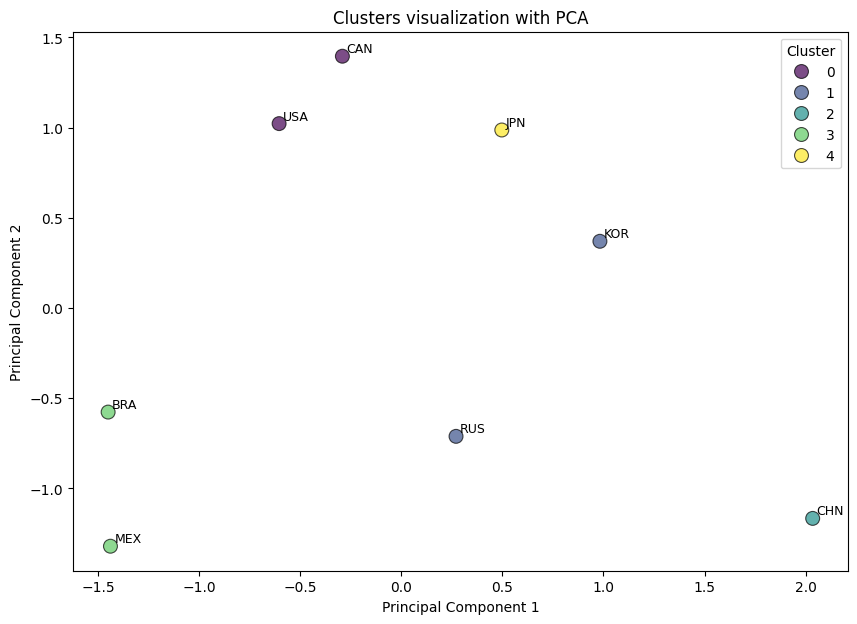

In [76]:
from sklearn.decomposition import PCA

# PCA를 사용하여 2차원으로 차원 축소
pca = PCA(n_components=2)
pca_components = pca.fit_transform(fer_wvs_df.iloc[:, 4:])

# 데이터프레임 생성 (주성분과 클러스터 레이블 포함)
df_pca = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = clusters
df_pca['Country'] = fer_wvs_df['Country']

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='viridis', s=100, alpha=0.7, edgecolor='k')

# 각 점에 레이블 추가
for i in range(df_pca.shape[0]):
    plt.text(df_pca['PCA1'][i] + 0.02, df_pca['PCA2'][i] + 0.02, df_pca['Country'][i], fontsize=9)

plt.title('Clusters visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [77]:
# 각 클러스터에 속한 'Country' 값을 출력
for cluster in range(kmeans.n_clusters):
    cluster_countries = fer_wvs_df[df_pca['Cluster'] == cluster]['Country'].values
    print(f'Cluster {cluster}에 속한 Country 값:')
    print(cluster_countries)

Cluster 0에 속한 Country 값:
['CAN' 'USA']
Cluster 1에 속한 Country 값:
['KOR' 'RUS']
Cluster 2에 속한 Country 값:
['CHN']
Cluster 3에 속한 Country 값:
['BRA' 'MEX']
Cluster 4에 속한 Country 값:
['JPN']


#### Clustering : Transpose (fer_wvs_df_transpose 이용)

- n_clusters 5

In [78]:
kmeans_trans = KMeans(n_clusters=5, random_state=123)  # 적절한 클러스터 수 선택
kmeans_trans.fit(fer_wvs_df_transpose.iloc[4:])
clusters = kmeans_trans.labels_

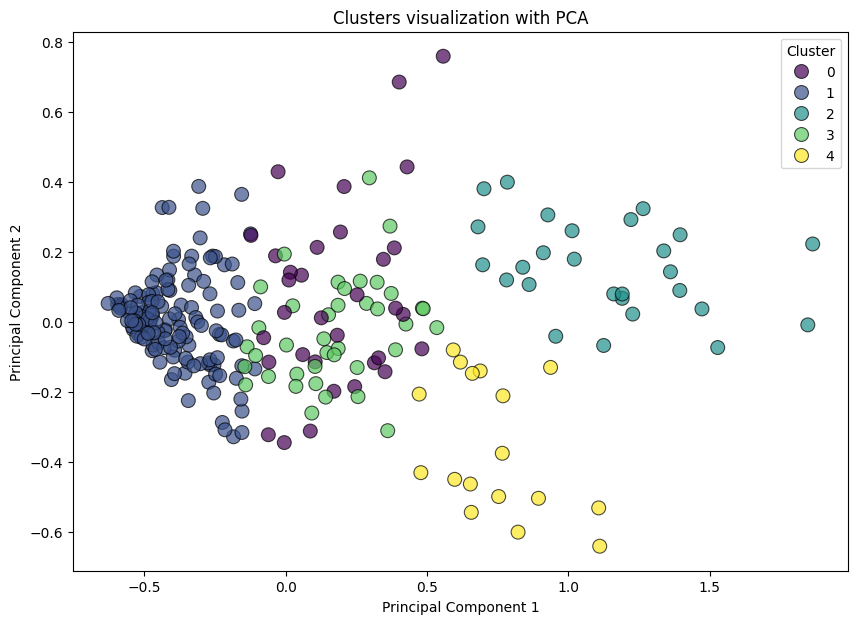

In [79]:
# PCA를 사용하여 2차원으로 차원 축소
pca = PCA(n_components=2)
pca_components = pca.fit_transform(fer_wvs_df_transpose.iloc[4:])

# 데이터프레임 생성 (주성분과 클러스터 레이블 포함)
df_pca = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = clusters

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='viridis', s=100, alpha=0.7, edgecolor='k')
plt.title('Clusters visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

- n_clusters 7

In [80]:
kmeans_trans = KMeans(n_clusters=7, random_state=123)
kmeans_trans.fit(fer_wvs_df_transpose.iloc[4:])
clusters = kmeans_trans.labels_

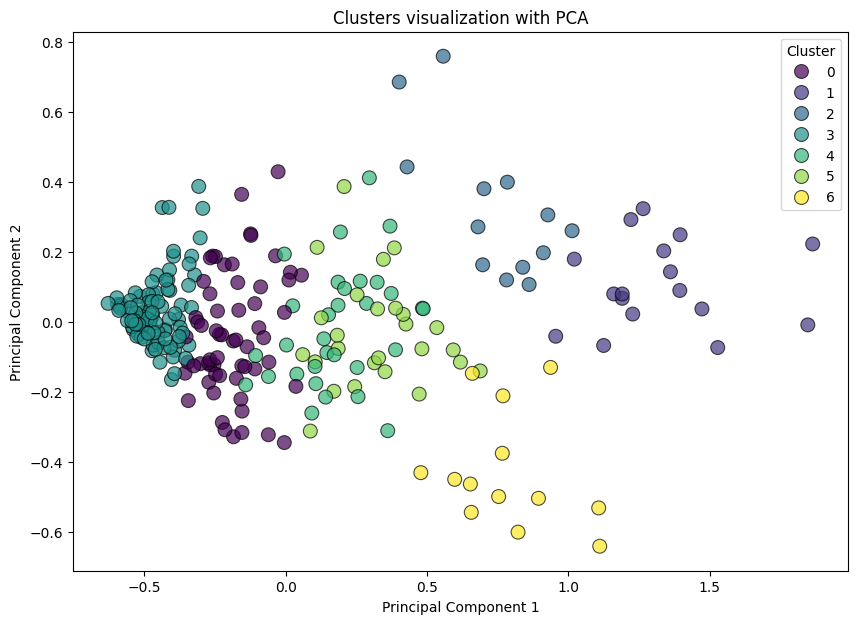

In [81]:
# PCA를 사용하여 2차원으로 차원 축소
pca = PCA(n_components=2)
pca_components = pca.fit_transform(fer_wvs_df_transpose.iloc[4:])

# 데이터프레임 생성 (주성분과 클러스터 레이블 포함)
df_pca = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = clusters

# 시각화
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='viridis', s=100, alpha=0.7, edgecolor='k')
plt.title('Clusters visualization with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

질문들을 클러스터링 한 후에, 기존의 출산율 데이터와 가장 관련이 높은 질문 그룹들이 무엇일지 알아보았다.

In [82]:
new_data = fer_wvs_df_transpose.iloc[1:4]
predicted_cluster = kmeans_trans.predict(new_data)  # 클러스터 예측
print("Fertility rates data belongs to Cluster:", predicted_cluster)

Fertility rates data belongs to Cluster: [1 1 1]


그 결과, 출산율 관련 데이터(연도별 출산율 데이터, 청소년 출산 빈도)와 가장 관련있는 클러스터는 공통적으로 1번 클러스터임을 알 수 있었다. 즉, 1번 클러스터에 속하는 질문들은 출산율과 관련이 있을 것이라 추측할 수 있다.

In [83]:
# 각 질문이 속한 클러스터 출력
selected_cluster_list = []
for i, label in enumerate(clusters):
    if label == predicted_cluster[0]:
        print(f"Q{i+1} belongs to Cluster {label}")
        selected_cluster_list.append(i+1)

Q1 belongs to Cluster 1
Q7 belongs to Cluster 1
Q10 belongs to Cluster 1
Q12 belongs to Cluster 1
Q18 belongs to Cluster 1
Q24 belongs to Cluster 1
Q44 belongs to Cluster 1
Q58 belongs to Cluster 1
Q179 belongs to Cluster 1
Q180 belongs to Cluster 1
Q181 belongs to Cluster 1
Q189 belongs to Cluster 1
Q190 belongs to Cluster 1
Q191 belongs to Cluster 1
Q192 belongs to Cluster 1
Q194 belongs to Cluster 1
Q202 belongs to Cluster 1


In [84]:
adjusted_cluster_list = [index + 3 for index in selected_cluster_list]
print(adjusted_cluster_list)

[4, 10, 13, 15, 21, 27, 47, 61, 182, 183, 184, 192, 193, 194, 195, 197, 205]


In [85]:
# 국가 이름 및 출산율 관련 데이터 추가(index : 0,1,2,3)
adjusted_cluster_list.extend([0,1,2,3])
adjusted_cluster_list.sort()
selected_columns_df = fer_wvs_df.iloc[:, adjusted_cluster_list]
selected_columns_df

,Country,1990,2021,Col4,Q1_ratio,Q7_ratio,Q10_ratio,Q12_ratio,Q18_ratio,Q24_ratio,...,Q58_ratio,Q179_ratio,Q180_ratio,Q181_ratio,Q189_ratio,Q190_ratio,Q191_ratio,Q192_ratio,Q194_ratio,Q202_ratio
0,BRA,2.9,1.6,45,0.852440,0.729285,0.705448,0.615210,0.670829,0.301362,...,0.569240,0.860386,0.591941,0.842792,0.893303,0.332577,0.788309,0.833712,0.790011,0.671396
1,CAN,1.8,1.4,7,0.796416,0.521901,0.509955,0.707317,0.898457,0.794923,...,0.639871,0.596565,0.513191,0.591339,0.832753,0.676456,0.533848,0.750622,0.521155,0.470881
2,CHN,2.5,1.2,11,0.860343,0.835968,0.788867,0.598155,0.963109,0.843544,...,0.851449,0.867260,0.779315,0.770422,0.795125,0.386693,0.738142,0.863966,0.795455,0.554018
3,JPN,1.5,1.3,3,0.920177,0.840355,0.753141,0.626016,0.988174,0.761271,...,0.702882,0.948263,0.864745,0.793052,0.864006,0.850702,0.836659,0.893570,0.792313,0.891353
4,KOR,1.6,0.8,2,0.889157,0.742169,0.875502,0.508434,0.980723,0.623293,...,0.802410,0.493173,0.430522,0.420884,0.543775,0.440964,0.446586,0.424096,0.393574,0.799197
5,MEX,3.5,1.8,54,0.970706,0.863871,0.655945,0.665709,0.772545,0.550258,...,0.733487,0.633544,0.464101,0.532453,0.672028,0.478461,0.594486,0.610569,0.585296,0.594486
6,RUS,1.9,1.5,15,0.835359,0.586188,0.681768,0.562983,0.881768,0.783978,...,0.851934,0.603315,0.342541,0.562983,0.615470,0.571271,0.645856,0.726519,0.565746,0.635912
7,USA,2.1,1.7,16,0.892142,0.496148,0.587827,0.692989,0.892912,0.696456,...,0.597843,0.668336,0.612481,0.703005,0.868644,0.706086,0.526194,0.810478,0.581664,0.493451


In [86]:
# 상관 계수 계산 및 필터링
corr_matrix = selected_columns_df.iloc[:, 1:].corr()
mask = np.abs(corr_matrix) < 0.5
filtered_corr_matrix = corr_matrix.mask(mask)

# 전체 히트맵 시각화
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
# plt.title('Correlation Matrix Heatmap')
# plt.show()

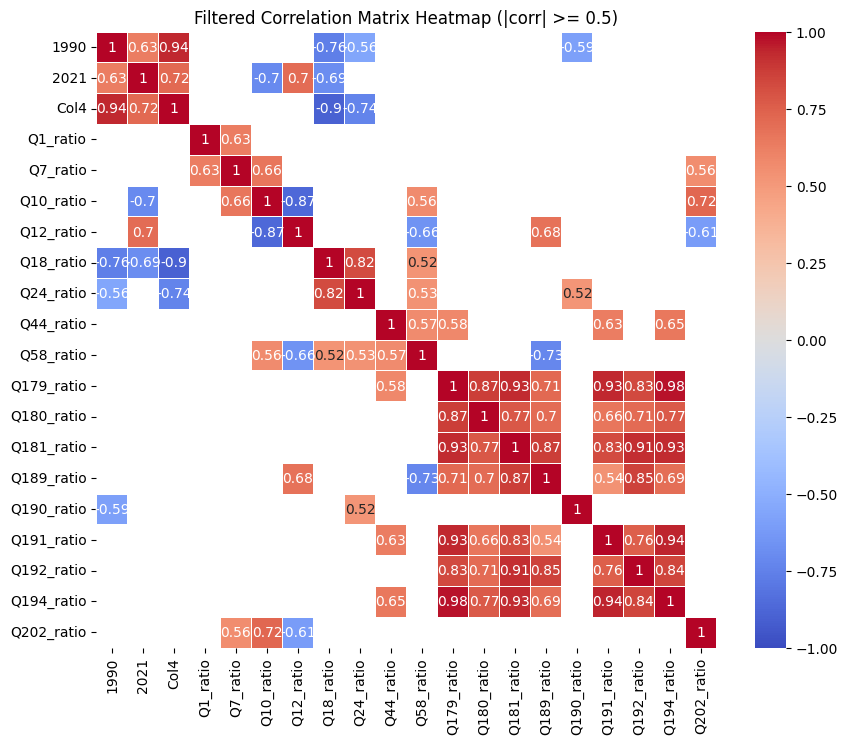

In [87]:
# 상관계수가 0.5를 넘는 값들만 표시
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Filtered Correlation Matrix Heatmap (|corr| >= 0.5)')
plt.show()

##### **질문(Q) 분석 1 : 출산율 데이터와 상관관계가 높은 질문들**

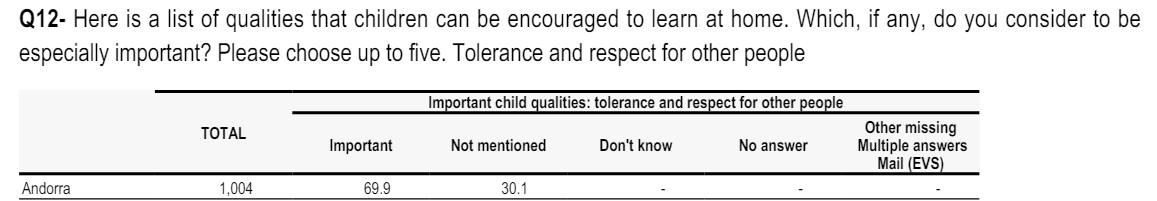

출산율 데이터는 현재 상관관계 시각화 결과를 보았을때 Q10, 12, 18의 결과에서 높은 상관관계를 보인다. Q12는 양의 상관관계, Q10과 Q18은 음의 상관관계를 가진다는 것도 특징이다. 특히 Q18은 출산율 관련 데이터 전체에서 높은 상관관계를 보이고 있다.

- **양의 상관관계**
  - Q12 : Here is a list of qualities that children can be encouraged to learn at home. Which, if any, do you consider to be especially important? Please choose up to five. Tolerance and respect for other people(다음은 가정에서 아이들에게 격려하여 가르칠 수 있는 자질 목록입니다. 그 중에서 특히 중요하다고 생각하는 자질을 다섯 가지까지 선택해 주세요. '다른 사람에 대한 관용과 존중')

- **음의 상관관계**
  - Q10 : Here is a list of qualities that children can be encouraged to learn at home. Which, if any, do you consider to be especially important? Please choose up to five. Feeling of responsibility(다음은 가정에서 아이들에게 격려하여 가르칠 수 있는 자질 목록입니다. 그 중에서 특히 중요하다고 생각하는 자질을 다섯 가지까지 선택해 주세요. '책임감을 느끼는 것')
  - Q18 : On this list are various groups of people. Could you please mention any that you would not like to have as neighbors? Drug addicts(이 목록에는 다양한 사람들 그룹이 나와 있습니다. 이웃으로 원하지 않는 그룹이 있다면 말씀해 주세요. 마약 중독자)


-> 즉, 상관관계만으로 보았을때, **아이들에게 가르칠 자질 중에 '다른 사람에 대한 관용과 존중'이 중요하다고 생각할수록 출산율이 높은 경향을 보이며, '책임감을 느끼는 것'이 중요하다고 생각할수록 낮은 경향을 보일 것이라 생각해볼 수 있다.**
또한, 이웃으로 마약중독자를 원하지 않는 비율이 높다면 출산율이 낮을 것이라고 생각해볼 수도 있다.

- 추가적으로 상관계수만으로 결론을 짓기는 부족하다고 생각하여 분석을 더 진행해보았다.

In [88]:
selected_fer_df = selected_columns_df.iloc[:, [0, 1, 2, 3, 6, 7, 8]]
selected_fer_df

,Country,1990,2021,Col4,Q10_ratio,Q12_ratio,Q18_ratio
0,BRA,2.9,1.6,45,0.705448,0.615210,0.670829
1,CAN,1.8,1.4,7,0.509955,0.707317,0.898457
2,CHN,2.5,1.2,11,0.788867,0.598155,0.963109
3,JPN,1.5,1.3,3,0.753141,0.626016,0.988174
4,KOR,1.6,0.8,2,0.875502,0.508434,0.980723
5,MEX,3.5,1.8,54,0.655945,0.665709,0.772545
6,RUS,1.9,1.5,15,0.681768,0.562983,0.881768
7,USA,2.1,1.7,16,0.587827,0.692989,0.892912


###### **클러스터링**

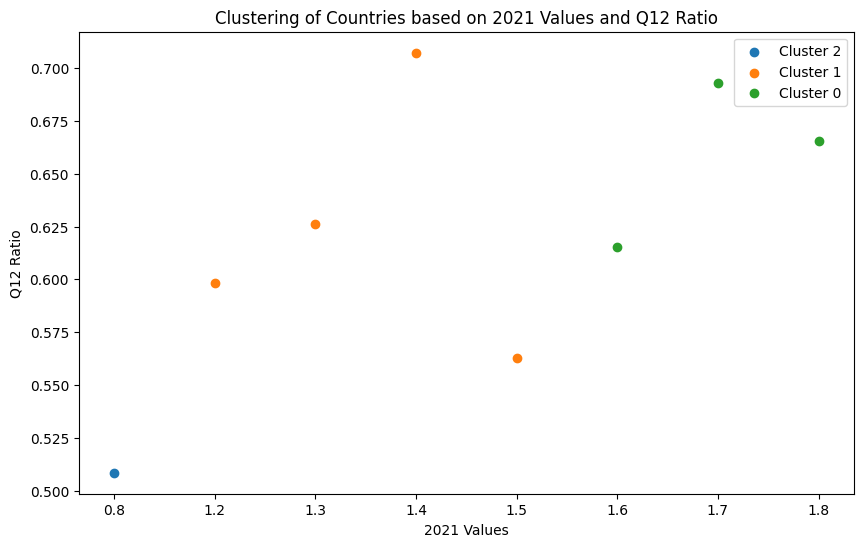

In [89]:
# 클러스터링에 사용할 변수 선택
selected_fer_df = selected_fer_df.sort_values(by='2021')
X = selected_fer_df[['2021', 'Q10_ratio', 'Q12_ratio', 'Q18_ratio']]

# K-means 클러스터링 모델 생성
kmeans = KMeans(n_clusters=3, random_state=42)  # 클러스터 개수는 임의로 3으로 설정
kmeans.fit(X)

# 클러스터링 결과 확인
selected_fer_df['Cluster'] = kmeans.labels_

# 클러스터링 결과 시각화(Q12)
plt.figure(figsize=(10, 6))
for cluster in selected_fer_df['Cluster'].unique():
    cluster_data = selected_fer_df[selected_fer_df['Cluster'] == cluster]
    plt.scatter(cluster_data['2021'], cluster_data['Q12_ratio'], label=f'Cluster {cluster}')
plt.xlabel('2021 Values')
plt.ylabel('Q12 Ratio')
plt.title('Clustering of Countries based on 2021 Values and Q12 Ratio')
plt.legend()
plt.show()

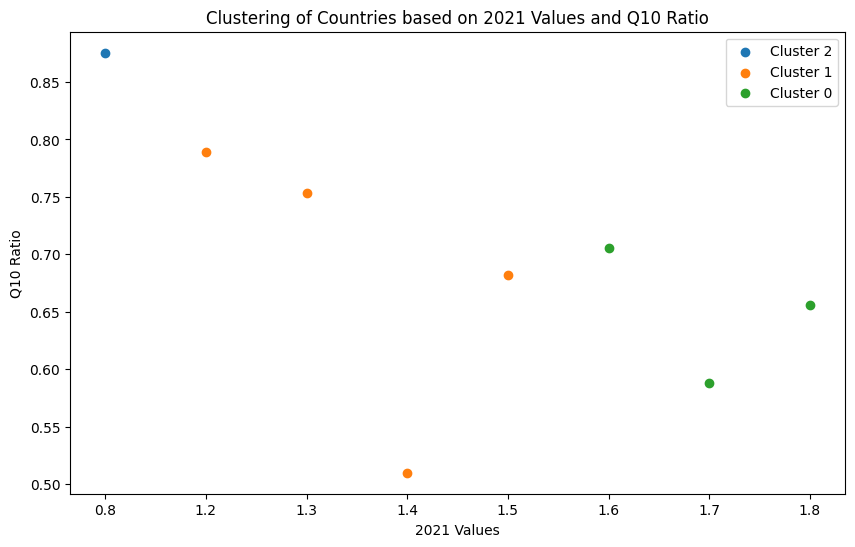

In [90]:
# 클러스터링 결과 시각화(Q10)
plt.figure(figsize=(10, 6))
for cluster in selected_fer_df['Cluster'].unique():
    cluster_data = selected_fer_df[selected_fer_df['Cluster'] == cluster]
    plt.scatter(cluster_data['2021'], cluster_data['Q10_ratio'], label=f'Cluster {cluster}')
plt.xlabel('2021 Values')
plt.ylabel('Q10 Ratio')
plt.title('Clustering of Countries based on 2021 Values and Q10 Ratio')
plt.legend()
plt.show()

###### **통계 검증(t-test, ANOVA)**

In [91]:
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings(action='ignore')

# 클러스터링 결과
selected_fer_df['Cluster'] = kmeans.labels_

# 각 클러스터별 데이터 구분
cluster_0_data = selected_fer_df[selected_fer_df['Cluster'] == 0]
cluster_1_data = selected_fer_df[selected_fer_df['Cluster'] == 1]
cluster_2_data = selected_fer_df[selected_fer_df['Cluster'] == 2]

cluster_0_data['2021'] = cluster_0_data['2021'].astype(float)
cluster_1_data['2021'] = cluster_1_data['2021'].astype(float)
cluster_2_data['2021'] = cluster_2_data['2021'].astype(float)

# t-test 진행
ttest_0_1 = ttest_ind(cluster_0_data['2021'], cluster_1_data['2021'])
ttest_0_2 = ttest_ind(cluster_0_data['2021'], cluster_2_data['2021'])
ttest_1_2 = ttest_ind(cluster_1_data['2021'], cluster_2_data['2021'])

# 결과 출력
print("Cluster 0 vs Cluster 1:", ttest_0_1)
print("Cluster 0 vs Cluster 2:", ttest_0_2)
print("Cluster 1 vs Cluster 2:", ttest_1_2)

Cluster 0 vs Cluster 1: TtestResult(statistic=3.872983346207416, pvalue=0.011724811003954652, df=5.0)
Cluster 0 vs Cluster 2: TtestResult(statistic=7.794228634059949, pvalue=0.016065301943345097, df=2.0)
Cluster 1 vs Cluster 2: TtestResult(statistic=3.8105117766515306, pvalue=0.03177698057239622, df=3.0)


In [92]:
from scipy.stats import f_oneway

# ANOVA 진행
anova_result = f_oneway(cluster_0_data['2021'], cluster_1_data['2021'], cluster_2_data['2021'])

# 결과 출력
print("ANOVA Result:", anova_result)

ANOVA Result: F_onewayResult(statistic=22.812500000000018, pvalue=0.003065578349908649)


###### **결론**

In [93]:
# 각 클러스터별 '2021' 값의 평균 계산
cluster_0_mean_2021 = cluster_0_data['2021'].mean()
cluster_1_mean_2021 = cluster_1_data['2021'].mean()
cluster_2_mean_2021 = cluster_2_data['2021'].mean()

# 결과 출력
print("Cluster 0의 '2021' 값 평균:", cluster_0_mean_2021)
print("Cluster 1의 '2021' 값 평균:", cluster_1_mean_2021)
print("Cluster 2의 '2021' 값 평균:", cluster_2_mean_2021)

# 각 클러스터별 'Q12_ratio' 값의 평균 계산
cluster_0_mean_2021 = cluster_0_data['Q12_ratio'].mean()
cluster_1_mean_2021 = cluster_1_data['Q12_ratio'].mean()
cluster_2_mean_2021 = cluster_2_data['Q12_ratio'].mean()

# 결과 출력
print("Cluster 0의 'Q12_ratio' 값 평균:", cluster_0_mean_2021)
print("Cluster 1의 'Q12_ratio' 값 평균:", cluster_1_mean_2021)
print("Cluster 2의 'Q12_ratio' 값 평균:", cluster_2_mean_2021)

Cluster 0의 '2021' 값 평균: 1.7
Cluster 1의 '2021' 값 평균: 1.35
Cluster 2의 '2021' 값 평균: 0.8
Cluster 0의 'Q12_ratio' 값 평균: 0.6579695217534329
Cluster 1의 'Q12_ratio' 값 평균: 0.6236180566170957
Cluster 2의 'Q12_ratio' 값 평균: 0.5084337349397591


각 클러스터에 대해 t-test를 진행한 결과 t-test와 anova 모든 경우에 유의 수준(0.05)이하의 p-value를 가지기 때문에, 각 클러스터 간의 출산율 평균값이 통계적으로 다르다는 것을 알 수 있다. 즉, 각 클러스터는 명확한 차이를 가지고 있다.

예를 들어, 실제로 각 클러스터의 '2021 출산율'의 평균값과, 'Q12_ratio'의 평균값을 비교해봐도 이는 확연하다. 각 출산율의 평균값이 낮을 수록 Q12_ratio의 값이 낮다. 즉, 다른 사람에 대한 관용과 존중이 중요하다고 생각할수록 출산율은 높으며, 덜 중요하다고 생각할 수록 출산율은 낮다.


##### **질문(Q) 분석 2 : 한국과 연관성이 높은 질문들**

분석에 앞서서 한국이 각 항목에서 어느 정도의 순위를 기록하였는지 알아보기 위해 데이터를 정리하였다.

In [94]:
# 각 열의 값에 대해 큰 순으로 순위 매기기
ranked_df = selected_columns_df.iloc[:, 4:].rank(ascending=False)

# Country 열을 다시 추가
ranked_df.insert(0, 'Country', selected_columns_df['Country'])
ranked_df.insert(1, '1990', selected_columns_df['1990'])
ranked_df.insert(2, '2021', selected_columns_df['2021'])
ranked_df.insert(3, 'Col4', selected_columns_df['Col4'])

print("\n각 열의 숫자가 큰 순으로 매긴 순위 DataFrame:")
ranked_df


각 열의 숫자가 큰 순으로 매긴 순위 DataFrame:


,Country,1990,2021,Col4,Q1_ratio,Q7_ratio,Q10_ratio,Q12_ratio,Q18_ratio,Q24_ratio,...,Q58_ratio,Q179_ratio,Q180_ratio,Q181_ratio,Q189_ratio,Q190_ratio,Q191_ratio,Q192_ratio,Q194_ratio,Q202_ratio
0,BRA,2.9,1.6,45,6.0,5.0,4.0,5.0,8.0,8.0,...,8.0,3.0,4.0,1.0,1.0,8.0,2.0,3.0,3.0,3.0
1,CAN,1.8,1.4,7,8.0,7.0,8.0,1.0,4.0,2.0,...,6.0,7.0,5.0,5.0,4.0,3.0,6.0,5.0,7.0,8.0
2,CHN,2.5,1.2,11,5.0,3.0,2.0,6.0,3.0,1.0,...,2.0,2.0,2.0,3.0,5.0,7.0,3.0,2.0,1.0,6.0
3,JPN,1.5,1.3,3,2.0,2.0,3.0,4.0,1.0,4.0,...,5.0,1.0,1.0,2.0,3.0,1.0,1.0,1.0,2.0,1.0
4,KOR,1.6,0.8,2,4.0,4.0,1.0,8.0,2.0,6.0,...,3.0,8.0,7.0,8.0,8.0,6.0,8.0,8.0,8.0,2.0
5,MEX,3.5,1.8,54,1.0,1.0,6.0,3.0,7.0,7.0,...,4.0,5.0,6.0,7.0,6.0,5.0,5.0,7.0,4.0,5.0
6,RUS,1.9,1.5,15,7.0,6.0,5.0,7.0,6.0,3.0,...,1.0,6.0,8.0,6.0,7.0,4.0,4.0,6.0,6.0,4.0
7,USA,2.1,1.7,16,3.0,8.0,7.0,2.0,5.0,5.0,...,7.0,4.0,3.0,4.0,2.0,2.0,7.0,4.0,5.0,7.0


In [95]:
# 'Country' 열이 'KOR'인 행 선택
kor_row = ranked_df[ranked_df['Country'] == 'KOR']
column_list = []

# 숫자가 7보다 큰 열만 선택하여 새로운 DataFrame에 추가(등수는 1등부터 8등까지임)
selected_data = pd.DataFrame(columns=kor_row.columns)
for column in kor_row.columns:
    if kor_row[column].dtype == 'float64' and kor_row[column].iloc[0] > 7:
        selected_data[column] = kor_row[column]
        column_list.append(column)

print("'KOR' 행에서 숫자가 7보다 큰 열")
print(column_list)

'KOR' 행에서 숫자가 7보다 큰 열
['Q12_ratio', 'Q179_ratio', 'Q181_ratio', 'Q189_ratio', 'Q191_ratio', 'Q192_ratio', 'Q194_ratio']


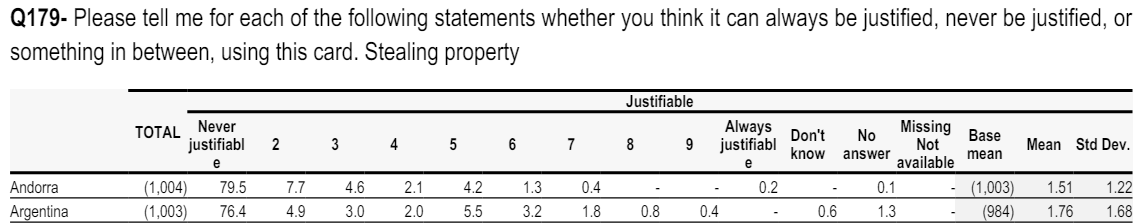

한국의 출산율은 앞서 살펴본 것과 같이 다른 나라와는 확연히 다르다. 그렇다면 한국은 어떤 특성을 가지고 있기 때문에 이러한 출산율을 가지게 되었을까?
여기에 대한 실마리를 Q179, 180, 181, 189, 190, 191, 192, 194가 서로 높은 상관관계를 가지고, 이 항목들에 대해서 한국이 유독 낮은 등수를 가지고 있다는 점에서 해당 질문들의 카테고리를 살펴보기로 하였다.
Q179부터 194의 질문은 특정 행동이 정당화될 수 있는지 없는지에 대한 설문의 결과로써, 현재 데이터에 포함된 각각의 ratio 값은 '정당화 될 수 없다'를 얼마나 선택하였는가에 대한 값이다.
실제로 Q180을 제외하고 아래의 모든 항목에서 한국은 가장 낮은 등수를 가진다.

- Q179
  - Please tell me for each of the following statements whether you think it can always be justified, never be justified, or something in between, using this card. Stealing property(다음 문장에 대해 이 카드를 사용하여 항상 정당화될 수 있는지, 절대로 정당화될 수 없는지 또는 그 사이에 어디에 속하는지 말해주세요. "재산을 훔치는 것")
- Q181
  - Please tell me for each of the following statements whether you think it can always be justified, never be justified, or something in between, using this card. Someone accepting a bribe in the course of their duties("다음 문장에 대해 이 카드를 사용하여 항상 정당화될 수 있는지, 절대로 정당화될 수 없는지 또는 그 사이에 어디에 속하는지 말해주세요. "직무 수행 중 뇌물을 받는 사람")
- Q189
  - Please tell me for each of the following statements whether you think it can always be justified, never be justified, or something in between, using this card. For a man to beat his wife("다음 문장에 대해 이 카드를 사용하여 항상 정당화될 수 있는지, 절대로 정당화될 수 없는지 또는 그 사이에 어디에 속하는지 말해주세요. "남편이 아내를 폭행하는 것"")
- Q191
  - Please tell me for each of the following statements whether you think it can always be justified, never be justified, or something in between, using this card. Violence against other people(
다음 문장에 대해 이 카드를 사용하여 항상 정당화될 수 있는지, 절대로 정당화될 수 없는지 또는 그 사이에 어디에 속하는지 말해주세요. "타인에 대한 폭력")
- Q192
  - Please tell me for each of the following statements whether you think it can always be justified, never be justified, or something in between, using this card. Terrorism as a political, ideological or religious mean(다음 문장에 대해 이 카드를 사용하여 항상 정당화될 수 있는지, 절대로 정당화될 수 없는지 또는 그 사이에 어디에 속하는지 말해주세요. "정치적, 이념적 또는 종교적 수단으로서의 테러리즘")
- Q194
  - Please tell me for each of the following statements whether you think it can always be justified, never be justified, or
something in between, using this card. Political violence
(다음 문장에 대해 이 카드를 사용하여 항상 정당화될 수 있는지, 절대로 정당화될 수 없는지 또는 그 사이에 어디에 속하는지 말해주세요. "정치적 폭력")

위에 나온 질문들은 결코 정당화 될 수 없는 항목들에 대해 '절대 정당화 될 수 없다.'를 얼마나 선택했느냐에 대한 비율이다. 그리고 한국은 답변 결과에서 알 수 있듯이 폭력에 대해 비교적 관대하다는 것을 알 수 있다.

이 결과 역시 한국 사회가 현재 어떤 문제를 가지고 있는지 짐작할 수 있게 한다. 다양한 종류의 폭력에 관대한 사회가 바로 한국 사회이다.

### **소주제 2 결론**



World Values Survey 데이터를 출산율 데이터와 함께 분석과정 및 결과는 다음과 같이 정리할 수 있다.

<br>

- **데이터 준비**

우선 WVS 데이터와 출산율 데이터의 나라 이름이 통일되어 있지 않은 경우들이 있어 나라를 선별하여 분석을 진행하였다. 선별 기준은 OECD 자료에서 GDP가 높은 나라 순으로 선별하였으며(GDP 18위까지 고려), WVS 데이터와 출산율 데이터에 공통적 나타나는 나라들을 대상으로 하였다.

또한 WVS 데이터는 한 나라에 한 행으로 이루어져 있지 않고, 각 개인의 답변이 한 행으로 이루어져 있었으므로 이를 공통되는 나라는 하나의 행으로 묶일 수 있도록 통합하였다. 통합한 방법은 각각의 질문(Q)들에 대한 1을 선택한 답변(첫번째 항목을 선택한 답변)의 비율을 나타냄으로서 진행하였다.

<br>

- **데이터 탐색**

각 질문들에 대해서 어떤 질문들이 비슷한 경향을 가지는지 알아보기 위해 상관계수를 구해서 알아보았다. 또한, 클러스터링을 진행하기 위해 fer_wvs_df를 transpose하여 각각의 질문이 각각의 행으로 배치되도록 하였다.

<br>

- **클러스터링**

fer_wvs_df와 fer_wvs_df_transpose를 사용하였으며, 전자는 각 나라들을 클러스터링 한 값, 후자는 각 질문을 클러스터링한 값이다.

이때 후자의 경우 총 7개의 클러스터로 데이터를 나눴을때, 출산율 데이터(1990년, 2021년의 출산율, 15-19세 출산 빈도)가 어떤 클러스터에 속하는지를 예측해보았고, 공통적으로 cluster 1에 속한다는 결과를 얻을 수 있었다.

따라서, 클러스터 1에 있는 질문들이 출산율과 관련이 있는 질문들이라는 가정하에 각각의 질문들과 출산율 데이터에 대해 상관계수를 다시 구해보았다.

그리고 시각화 한 결과를 바탕으로 크게 2가지의 결과를 도출해보았다.

<br>

- **질문(Q) 분석 1 : 출산율 데이터와 상관관계가 높은 질문들**

출산율 데이터와 상관관계가 +-0.5이상으로 나온 값들중에는 Q10, Q12, Q18 값이 있었다.

Q12는 강한 양의 상관관계, Q10과 Q18은 강한 음의 상관관계를 가지고 있다는 특징이 있었으며, 이를 클러스터링을 진행하여 시각화 해보았다. 그 결과 Q12와 2021년의 출산율, Q10과 2021년의 출산율 간에 어느정도 선형적인 패턴을 보임을 확인할 수 있었다.

이를 검증하기 위해서 통계검증을 실행하였다. 각각의 클러스터에 대해서 t-test와 ANOVA를 실행한 결과, p-value가 모두 유의 수준(0.05)을 넘지 않았다. 즉, 각 클러스터의 평균이 유의미하게 차이를 보였다는 결론을 얻을 수 있다.

그렇기 때문에 결론적으로, 아이들에게 가르칠 자질 중에 '다른 사람에 대한 관용과 존중'이 중요하다고 생각할수록 출산율이 높은 경향을 보이며, '책임감을 느끼는 것'이 중요하다고 생각할수록 낮은 경향을 보일 것이라 생각해볼 수 있다. 또한, 이웃으로 마약중독자를 원하지 않는 비율이 높다면 출산율이 낮을 것이라고 생각해볼 수도 있다.

<br>

- **결론**

한국의 경우에 대입해보면, 한국은 아이들에게조차 높은 책임감을 요구하고 있고, 다른 사람에 대한 관용과 존중을 보일 여유를 주지 않는 사회라고도 할 수 있다. 그리고 그런 특징을 가진 나라가 출산율이 낮은 것이라면, 다른 사람을 배려하며 함께 살아갈 수 있을만큼의 분위기가 형성된다면 출산율도 올라갈 것이라 예측해볼 수 있다.

즉, 사회경제적인 측면 뿐만 아니라 사람들의 가치관도 출산율에 영향을 미친다는 것을 고려하여, 한국 사회에 어떤 가치를 더 중요하게 여기고 지향해야 할지를 알 수 있었다.


## 전체 결론

이번 분석을 통해 한국의 비정상적으로 낮은 출산율의 원인에 대해서 탐구해보았다. 큰 소주제 2개를 바탕으로 총 4개의 가설을 들어 이를 분석해보고자 하였으며, 다양한 분석 기법을 활용해 결론을 도출하였다.

중요한것은 저출산으로 인해 앞으로의 한국에서 벌어질 문제들을 해결하기 위해 출산율만을 높이고자 하는 건 단편적인 접근인 것 같다. 나라의 출산율이 떨어지기 때문에 아이를 낳아 길러야 한다는 접근이 과연 새로운 가족의 행복을 보장할 수 있을까에 대한 의문이 든다.

그보다는 아이를 낳고 잘 기를 수 있는 생활을 마련한다면 자연스럽게 아이를 낳아 기르고 싶다는 생각을 하게 되지 않을까?

그리고 기존의 출산 지원 정책들([2024 보건복지부 발표](https://www.mohw.go.kr/board.es?mid=a10503010100&bid=0027&act=view&list_no=1479667&tag=&nPage=1))은 이미 아이를 낳은 가정에 대해서 이뤄지고 있다. 물론 아이를 낳은 가정에 대한 지원 정책들도 중요하지만, 거기에 더해서 청년층에 대한 지원도 많이 이뤄져야 하지 않을까라는 생각으로 분석을 진행했었다. 일반적인 관점에서 생각해보면 아이를 낳고 나면 저렇게 많은 지원이 있으니까 아이를 낳아야겠다, 라고 생각하는 사람은 별로 많지 않을 것이라 생각한다. 그보다는 오히려 먹고 살만해진 다음에 나도 아이를 기르고 싶다라는 자연스러운 기대감을 심어주는게 더 도움이 될거라고 생각한다.

이번 분석에서는 아쉽게도 청년층의 사회진출과 출산율간에 뚜렷한 경향성을 확인하지는 못했으나, 청년층의 사회진출이 늦어지면 결혼 및 가정을 꾸리는 시기가 늦어지고, 이것이 출산율과 관련이 될 것임을 우리는 유추해볼 수 있고, 출산율을 높이기 위해서 청년층의 사회 진출 시기를 앞당길 수 있도록 하는 지원 정책들이 필요하다고 생각한다.

또한, 가설 4에서 나온 결과를 토대로 생각해본 '가치관과 출산율의 관계'에 대해서는 유의미한 결과를 얻을 수 있었다. 현재의 한국은 아이들에게조차 높은 책임감을 요구하며 성인이 되기 이전의 대부분의 시간이 공부 이외의 것으로 낭비하는 것을 허용하지 않고 있다. 또한, 다른 사람에 대한 관용과 존중을 보일 여유를 주지 않는 사회라고도 할 수 있다.

그렇다면 앞서 언급한 것처럼, 다른 사람을 배려할 수 있을만한 여유를 가지고, 높은 책임감에 짓눌려 살지 않는, 즉, '살아갈만해진' 이후에 비로소 우리 사회의 출산율이 높아질 수 있지 않을것이라는 생각을 해본다.

## 부록

### 데이터 출처

1. [시도/합계출산율, 모의 연령별 출산율](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B81A21), 통계청, '전체_모연령별출산율.csv'
2. [각 나라별 1990년, 2021년의 출산율과 15-19세 출산 빈도](https://wdi.worldbank.org/table/2.14), The World Bank, 직접 크롤링, 'Fertility_rates.csv'
2. [각 나라별 국회의원 평균 연령 Average age of all members](https://data.ipu.org/compare/?field=age_average&region=0&structure=&chart=map&year_to=#), IPU parline: global data on national parliaments, 직접 크롤링
4. 한국 국회의원 평균연령 데이터 추가 근거 :
https://factcheck.snu.ac.kr/facts/show?id=3705
5. [각 나라별 15-24세 고용률](https://data.oecd.org/emp/employment-rate-by-age-group.htm#indicator-chart), OECD, 직접 크롤링
6. [WVS Wave 7 세계 가치관 조사 결과](https://www.worldvaluessurvey.org/WVSDocumentationWV7.jsp), World Values Survey
7. [대한민국 인구 피라미드 시각화 자료](https://sgis.kostat.go.kr/jsp/pyramid/pyramid1.jsp), 통계지리정보서비스
8. [대한민국 기업규모별_연령대별_소득](https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1EP_2014&conn_path=I2), 통계청, '기업규모별_연령대별_소득_20240523145747.csv'

### 데이터 크롤링 코드

#### 각 나라별 1990년, 2021년의 출산율과 15-19세 출산 빈도

In [96]:
# from selenium import webdriver

# driver = webdriver.Chrome('C:/Users/laonm/Downloads/chromedriver.exe')

# driver.get("https://wdi.worldbank.org/table/2.14")

# text_list = []
# for i in range(222):
#     text = driver.find_element_by_xpath(f"""//*[@id="scrollTable"]/tbody/tr[{i+1}]""").text
#     text_list.append(text)
# print(text_list)
# driver.quit()

In [97]:
# rows = [item.split('\n') for item in text_list]
# columns = ["Country", "1990", "2021", "Col4", "Col5", "Col6", "Col7", "Col8", "Col9", "Col10", "Col11", "Col12"]
# df = pd.DataFrame(rows, columns=columns)
# df.head(5)

In [98]:
# df.to_csv('Fertility_rates.csv', index=False)

#### 각 나라별 국회의원 평균 연령

In [99]:
# from selenium import webdriver
# import time

# driver = webdriver.Chrome('C:/Users/laonm/Downloads/chromedriver.exe')

# driver.get("https://data.ipu.org/compare/?field=age_average&region=0&structure=&chart=map&year_to=#")

# country_list = []
# value_list = []

# for i in range(275):
#     text = driver.find_element_by_xpath(f"""//*[@id="content"]/div[2]/div/div/div[3]/div[2]/div/table/tbody/tr[{i+3}]/td[1]
# """).text
#     country_list.append(text)
#     value = driver.find_element_by_xpath(f"""//*[@id="content"]/div[2]/div/div/div[3]/div[2]/div/table/tbody/tr[{i+3}]/td[3]
# """).text
#     value_list.append(value)

# print(country_list)
# driver.quit()

In [100]:
# df = pd.DataFrame({'Country': country_list, 'Value': value_list})
# print(df)

In [101]:
# # "No information available"을 NaN(결측치)으로 바꾸기
# df['Value'] = df['Value'].replace("No information available", pd.NA)

# df_cleaned = df.dropna()
# print(df_cleaned)

In [102]:
# # 'Value' 열에서 앞의 숫자값만 추출하는 함수 정의
# def extract_number(value_string):
#     return float(value_string.split()[0])

# # 'Value' 열의 모든 행에 함수 적용하여 앞의 숫자값 추출
# df_cleaned['Value'] = df_cleaned['Value'].apply(extract_number)
# print(df_cleaned)

In [103]:
# # 'Country' 값이 같은 행을 그룹화하여 각 그룹에 대해 평균을 계산하고 새로운 데이터프레임 생성
# new_df = df_cleaned.groupby('Country', as_index=False)['Value'].mean()
# print(new_df)

In [104]:
# new_df.to_csv('Chamber_age.csv')

#### 각 나라별 15-24세 고용률

In [105]:
# from selenium import webdriver
# import time

# driver = webdriver.Chrome('C:/Users/laonm/Downloads/chromedriver.exe')

# driver.get("https://data.oecd.org/emp/employment-rate-by-age-group.htm#indicator-chart")
# driver.find_element_by_xpath("""//*[@id="indicator-chart"]/div[1]/div/ul/li[3]""").click()

# time.sleep(10)

# text_list = []
# for i in range(43):
#     text = driver.find_element_by_xpath(f"""//*[@id="indicator-chart"]/div[2]/div[3]/div[1]/div[1]/div/div/table/tbody/tr[{i+1}]
# """).text
#     text_list.append(text)

# print(text_list)
# driver.quit()

In [106]:
# # 리스트를 국가와 값으로 분리
# countries = []
# values = []

# import pandas as pd

# for item in text_list:
#     country, value = ' '.join(item.split()[:-1]), item.split()[-1]
#     countries.append(country)
#     values.append(float(value))

# # 데이터프레임 생성
# df = pd.DataFrame({
#     'Country': countries,
#     'Value': values
# })

# print(df)

In [107]:
# df.to_csv("Employment_rate.csv")

### 추가 자료 : What Makes Life Meaningful?

'What Makes Life Meaningful? Views From 17 Advanced Economies'(https://www.pewresearch.org/global/2021/11/18/what-makes-life-meaningful-views-from-17-advanced-economies/) 라는 자료에서 한국이 유독 이상값을 보이는 경향이 있었다.


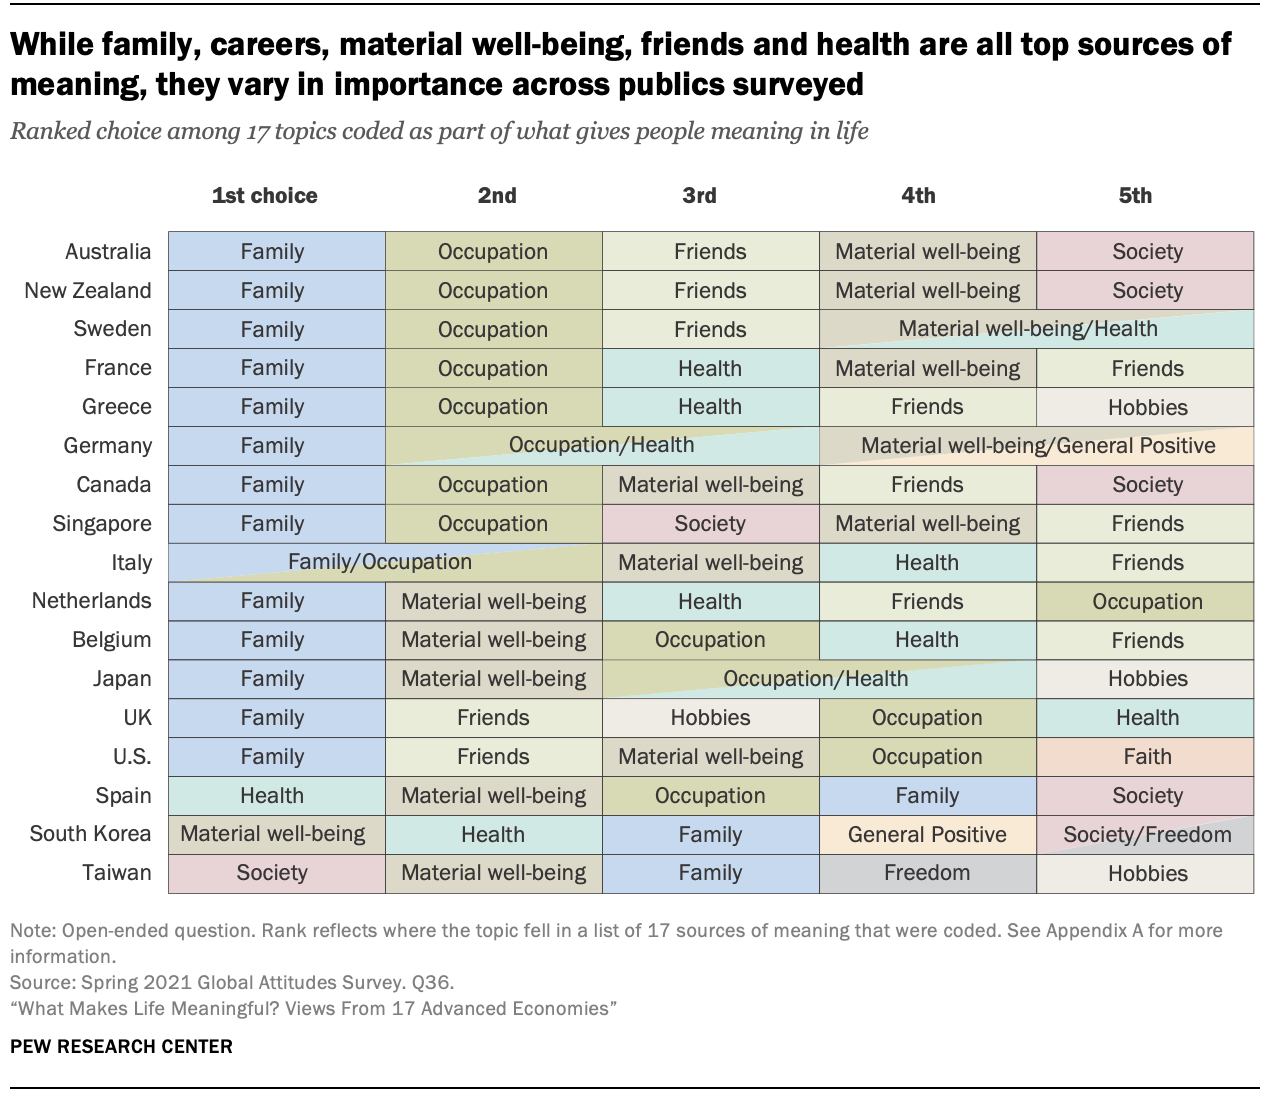

이 통계 결과의 경우 따로 데이터를 제공하고는 있지 않아서 분석을 진행하진 못했지만, 다른 나라에서는 '인생에 의미를 주는 것'으로 가족을 1순위로 꼽은 반면 한국에서는 유일하게 물질적인 것을 1순위로 꼽았다.

또한, 많은 나라들에서 2위 혹은 순위권에 들었던 '직업'의 경우에 한국의 경우 순위권에조차 없다.

어쩌면 이런 결과들이 한국의 출산율이 비정상적으로 낮은 이유를 보여주는 것이 아닐까,라는 생각도 하게 되었다. 가족보다 물질적인 것, 자신의 건강이 더 중요한 사회. 돈은 추구하지만 돈을 벌기 위한 직업은 의미있다고 생각하지 않는 사회. 그렇다면 자연히 출산은 우선순위에서 뒤로 밀리게 될 것이다.

추후 기회가 된다면 왜 한국은 가족과 직업에서 의미를 크게 찾지 못하고, 그보다도 돈을 의미있게 여기게 되었는가에 대해서도 분석을 진행하고 싶다.
